# Import Packages

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import kagglehub
import matplotlib.pyplot as plt

# Load Data

In [5]:
# Load the CSV file into a DataFrame
matches_csv_path = "Data/matches_2.csv"
matches_df = pd.read_csv(matches_csv_path, low_memory=False)

# Display the DataFrame
matches_df.head()

id  country_id  league_id     season  stage        date  match_api_id  \
0  4778        4769       4769  2008/2009      1  2008-08-09        483138   
1  4777        4769       4769  2008/2009      1  2008-08-09        483137   
2  4776        4769       4769  2008/2009      1  2008-08-09        483136   
3  4775        4769       4769  2008/2009      1  2008-08-09        483135   
4  4774        4769       4769  2008/2009      1  2008-08-09        483134   

   home_team_api_id  away_team_api_id  home_team_goal  ...  home_team_losses  \
0              9873              9853               1  ...               0.0   
1              9874              9855               1  ...               0.0   
2              9851              8592               4  ...               0.0   
3              8481              8639               0  ...               0.0   
4              9829              9847               1  ...               0.0   

   away_team_losses  home_team_formation  away_team_formation  \
0               0.0                4-4-2                4-5-1   
1               0.0                4-4-2                4-4-2   
2               0.0                4-4-2                4-4-2   
3               0.0                4-5-1                4-3-3   
4               0.0                4-4-2                4-4-2   

   home_team_num_defenders  home_team_num_midfielders  \
0                        4                          4   
1                        4                          4   
2                        4                          4   
3                        4                          5   
4                        4                          4   

   home_team_num_attackers  away_team_num_defenders  \
0                        2                        4   
1                        2                        4   
2                        2                        4   
3                        1                        4   
4                        2                        4   

   away_team_num_midfielders  away_team_num_attackers  
0                          5                        1  
1                          4                        2  
2                          4                        2  
3                          3                        3  
4                          4                        2  

[5 rows x 1072 columns]

In [6]:
# Load the CSV file into a DataFrame
expenditure_csv_path = "Data/expenditure.csv"
expenditure_df = pd.read_csv(expenditure_csv_path, low_memory=False)

# Display the DataFrame
expenditure_df.head()

Club      league  Expenditure  Arrivals      Income  \
0         Hamburger SV  Bundesliga   34450000.0        15  45200000.0   
1        VfL Wolfsburg  Bundesliga   33100000.0        19   4530000.0   
2        FC Schalke 04  Bundesliga   15750000.0         8   9000000.0   
3    Borussia Dortmund  Bundesliga   13750000.0        13  12300000.0   
4  TSG 1899 Hoffenheim  Bundesliga   11950000.0        10    125000.0   

   Departures     Balance     season  league_id  team_api_id  
0          14  10750000.0  2008/2009       7809         9790  
1          22 -28570000.0  2008/2009       7809         8721  
2          11  -6750000.0  2008/2009       7809        10189  
3          17  -1450000.0  2008/2009       7809         9789  
4          16 -11830000.0  2008/2009       7809         8226

In [7]:
# Download the dataset from Kaggle and return the path where it's stored
path = kagglehub.dataset_download("hugomathien/soccer")

# Connect to the SQLite database file located in the downloaded dataset
conn = sqlite3.connect(os.path.join(path, 'database.sqlite'))

# Retrieve tables
player_df = pd.read_sql_query("SELECT * FROM Player", conn)
player_attributes_df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
league_df = pd.read_sql_query("SELECT * FROM League", conn)
team_df = pd.read_sql_query("SELECT * FROM Team", conn)
team_attributes_df = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

# EDA

## player_attributes_df

In [10]:
# Print info of team_attributes_df
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

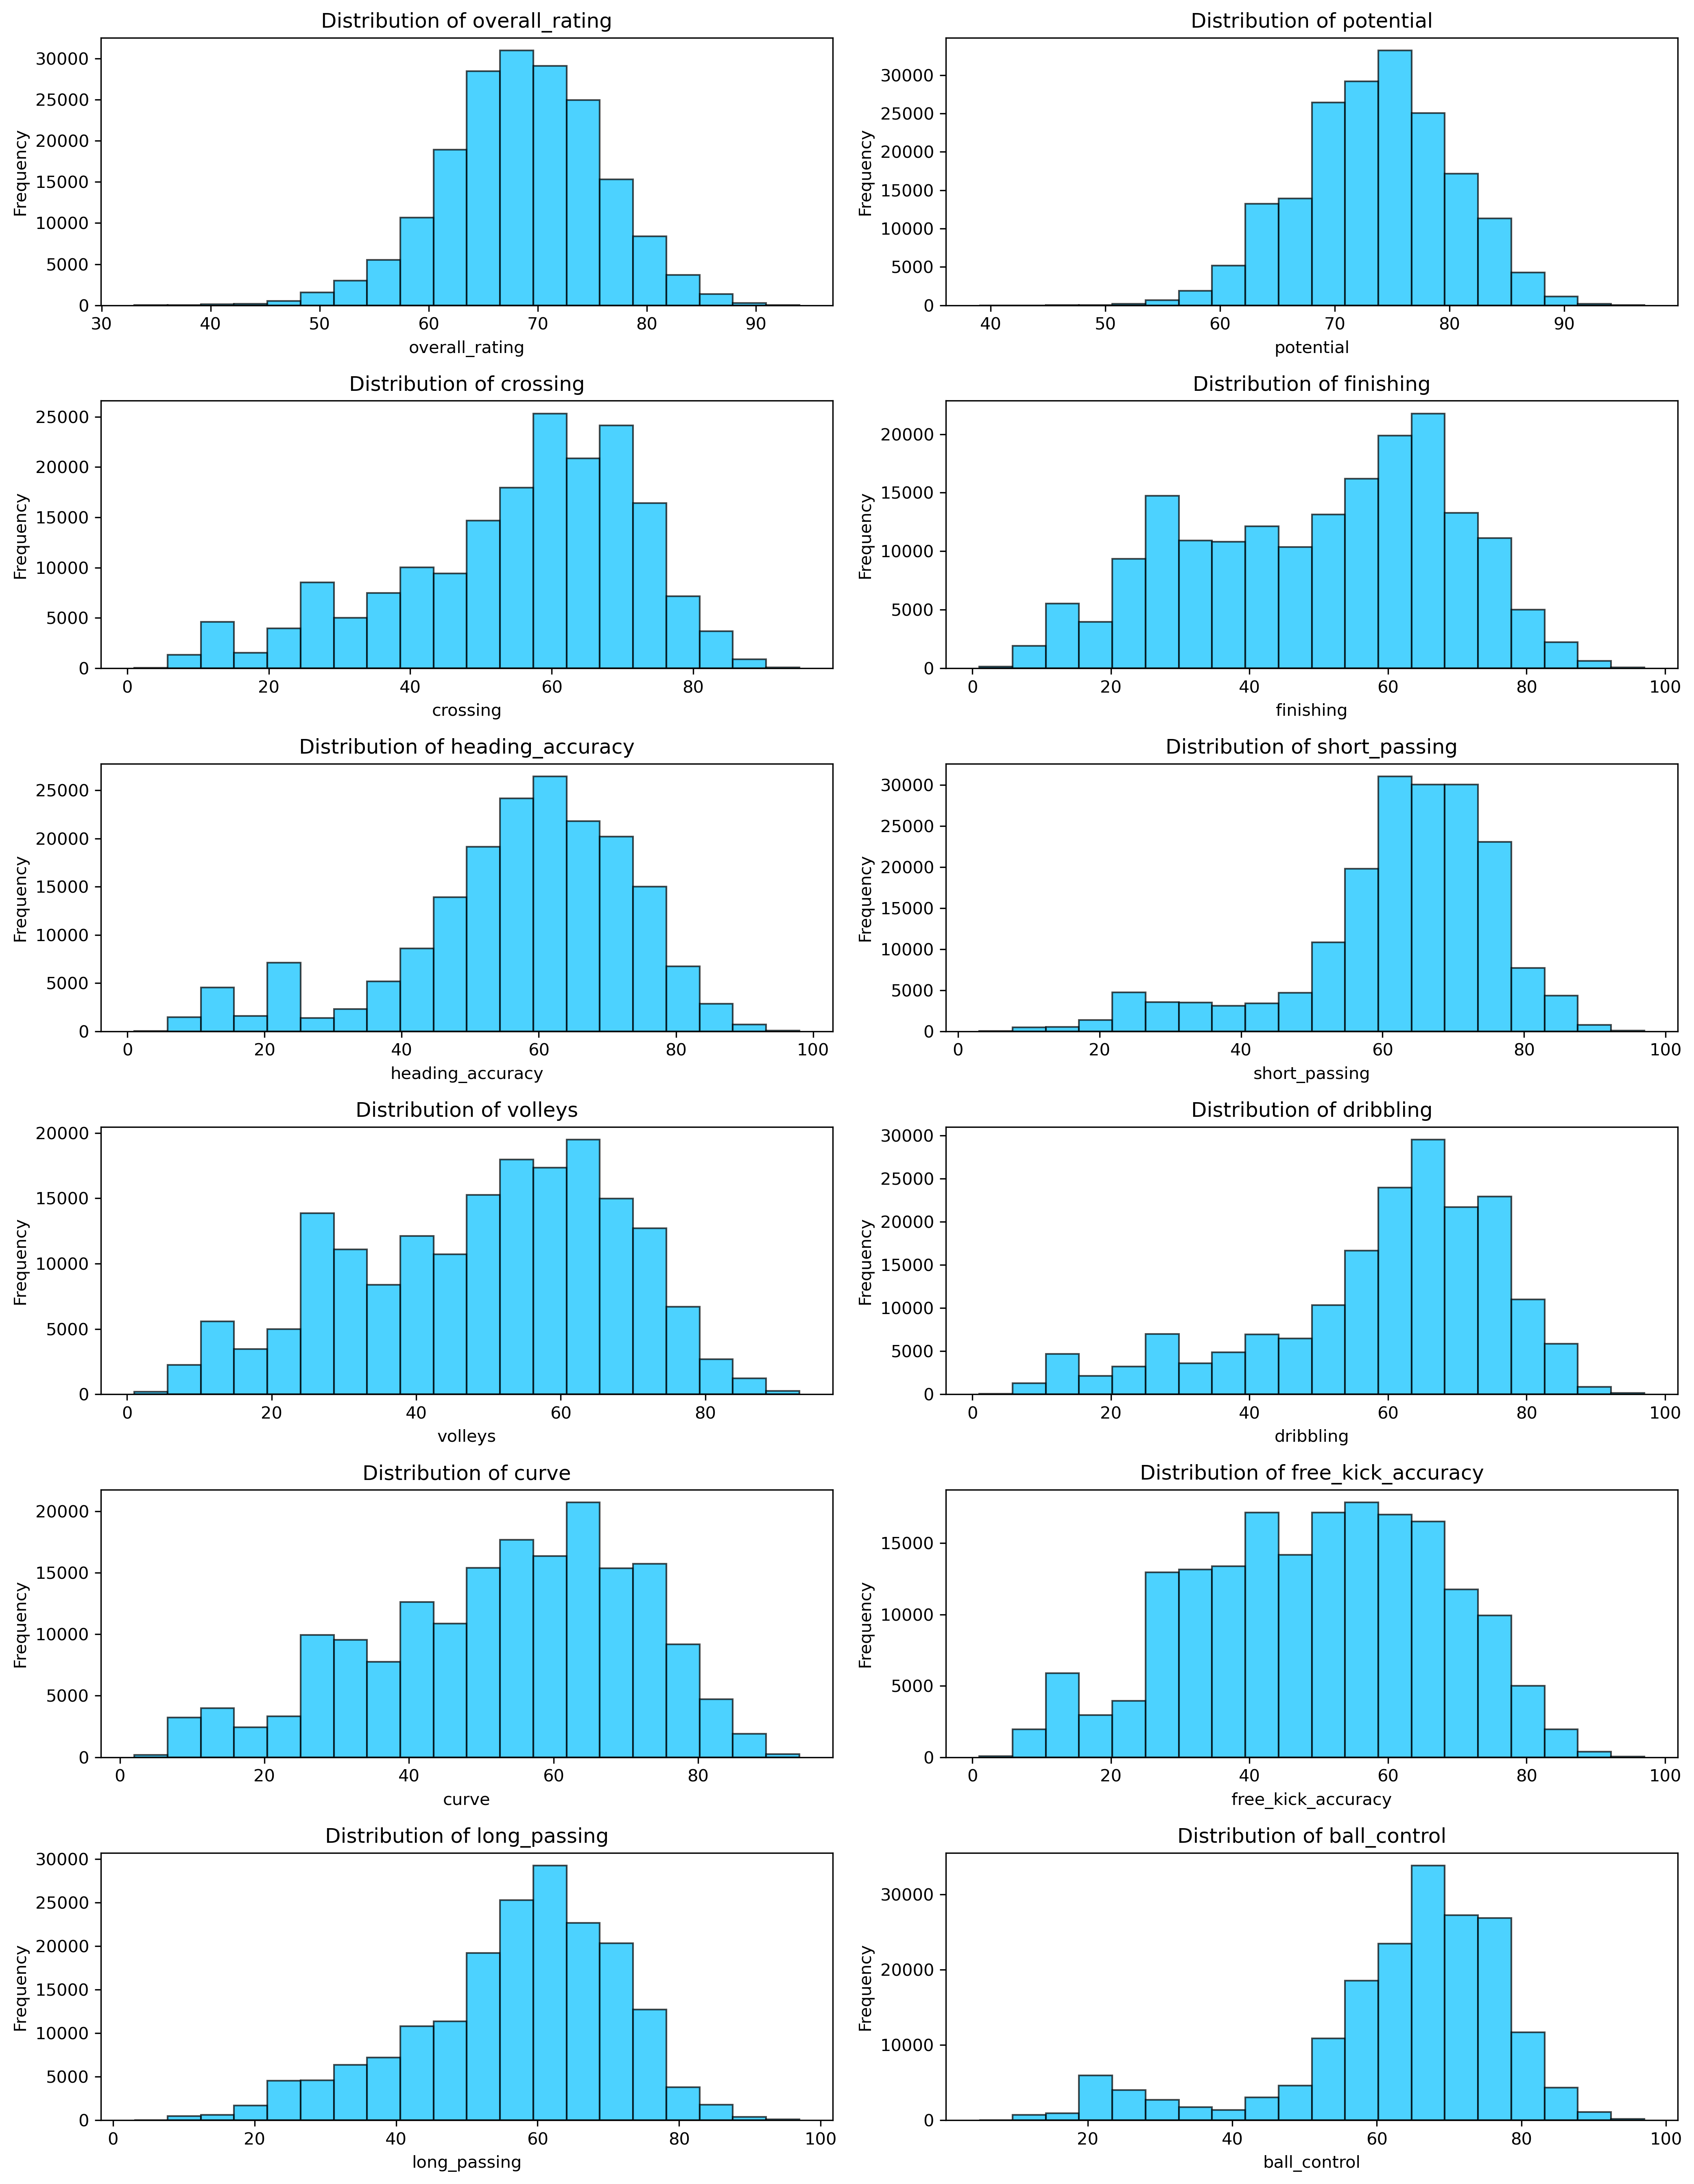

In [11]:
# List of columns to plot
columns_to_plot = [
    'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 
    'long_passing', 'ball_control'
]

# Create a figure and axes
fig, axes = plt.subplots(6, 2, figsize=(14, 18), dpi=300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    player_attributes_df[column].plot(kind='hist', bins=20, color='deepskyblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

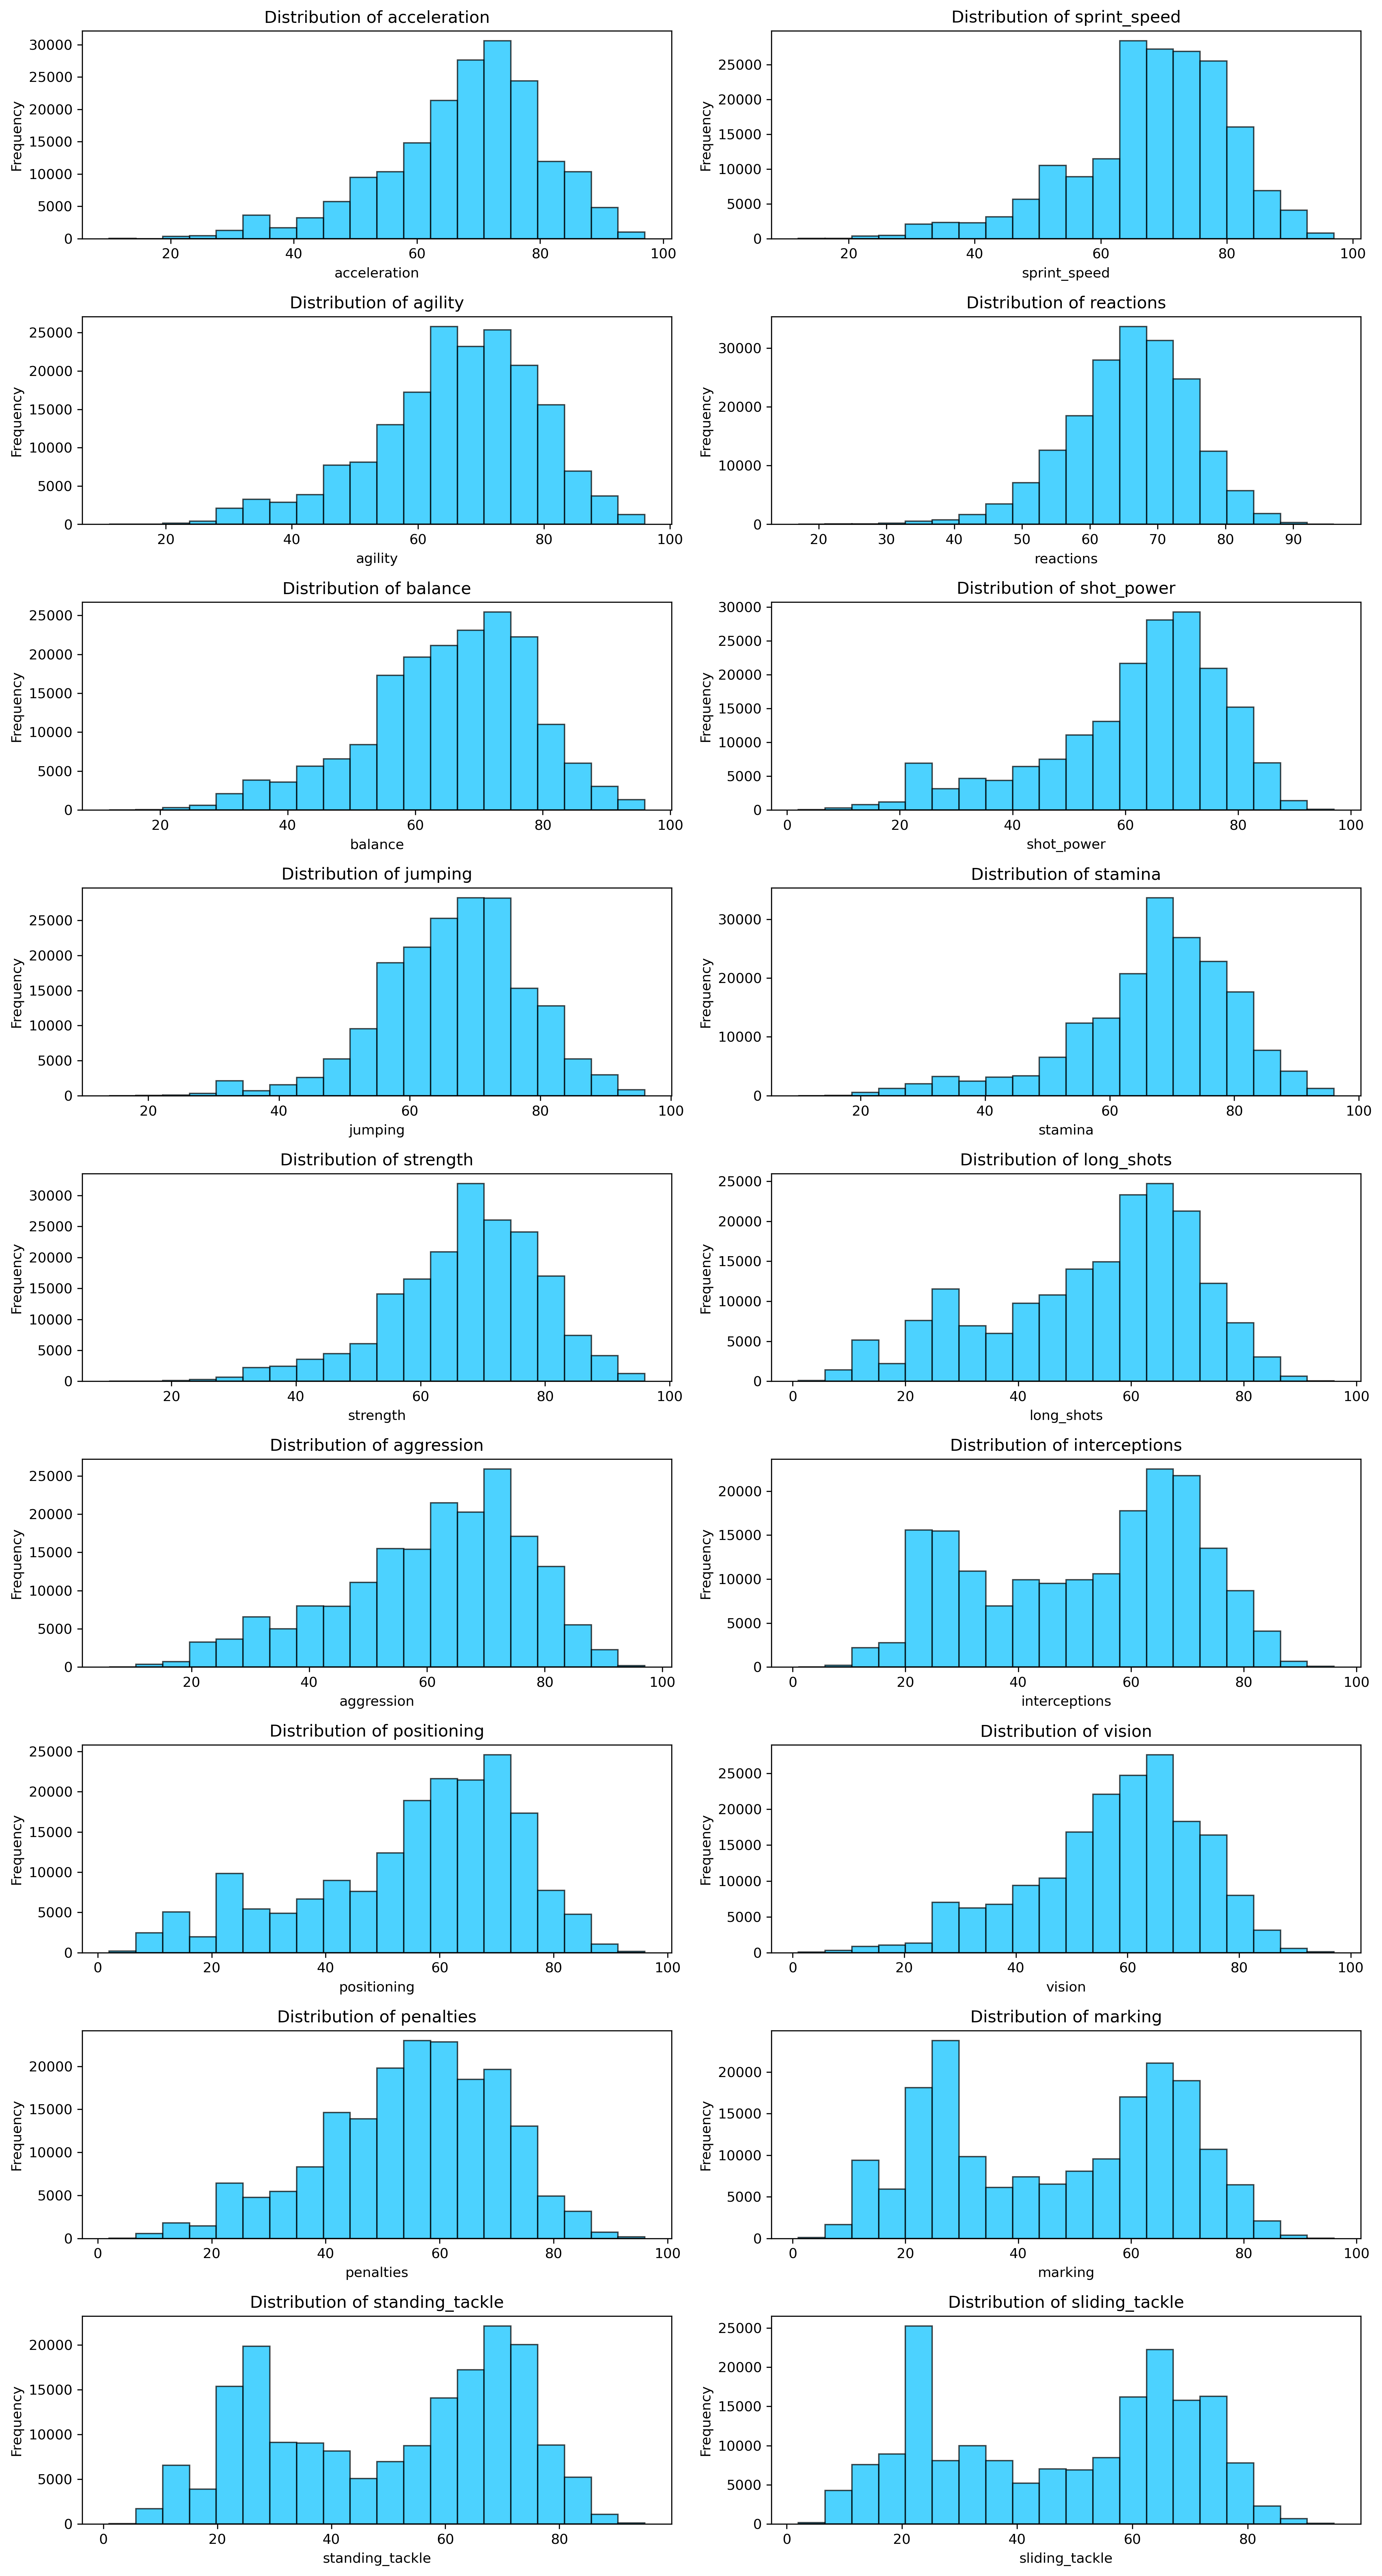

In [12]:
# List of columns to plot
columns_to_plot = [
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 
    'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
    'penalties', 'marking', 'standing_tackle', 'sliding_tackle'
]

# Create a figure and axes
fig, axes = plt.subplots(9, 2, figsize=(14, 26), dpi=300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    player_attributes_df[column].plot(kind='hist', bins=20, color='deepskyblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

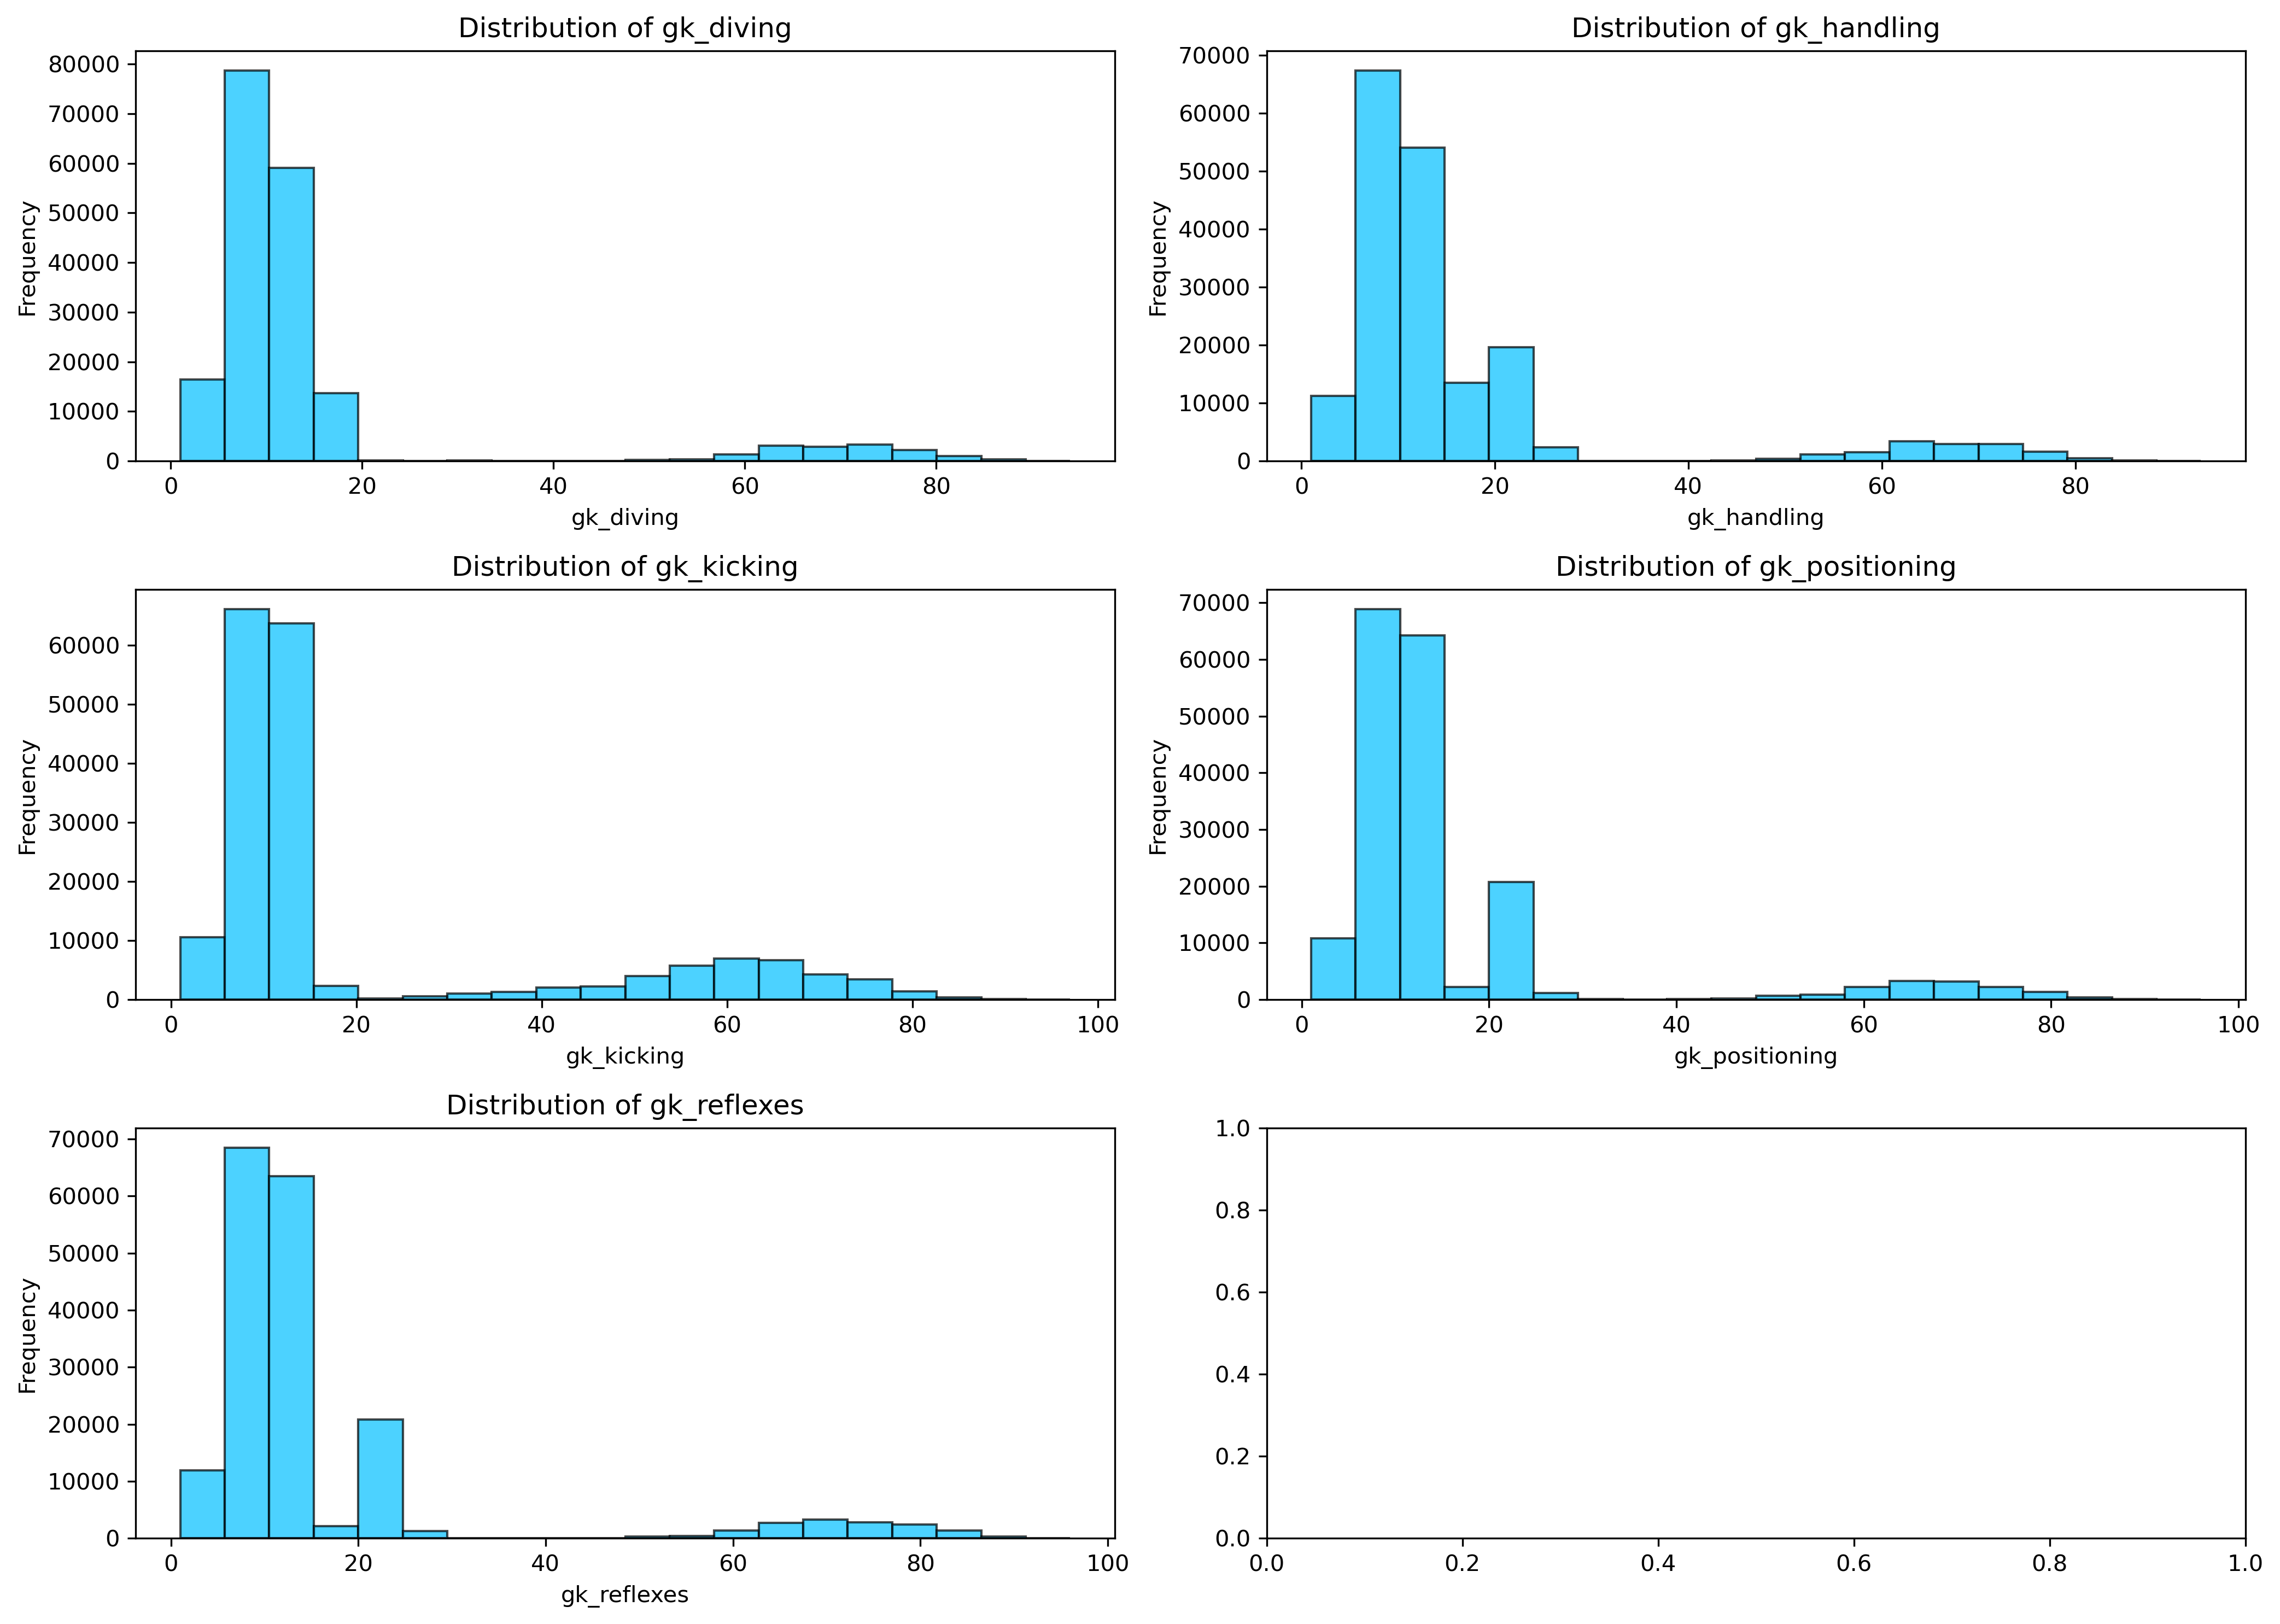

In [13]:
# List of columns to plot
columns_to_plot = [
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
]

# Create a figure and axes
fig, axes = plt.subplots(3, 2, figsize=(14, 10), dpi=300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    player_attributes_df[column].plot(kind='hist', bins=20, color='deepskyblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

## team_attributes_df

In [15]:
# Print info of team_attributes_df
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [16]:
print(team_attributes_df.columns.tolist())

['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribbling', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass']


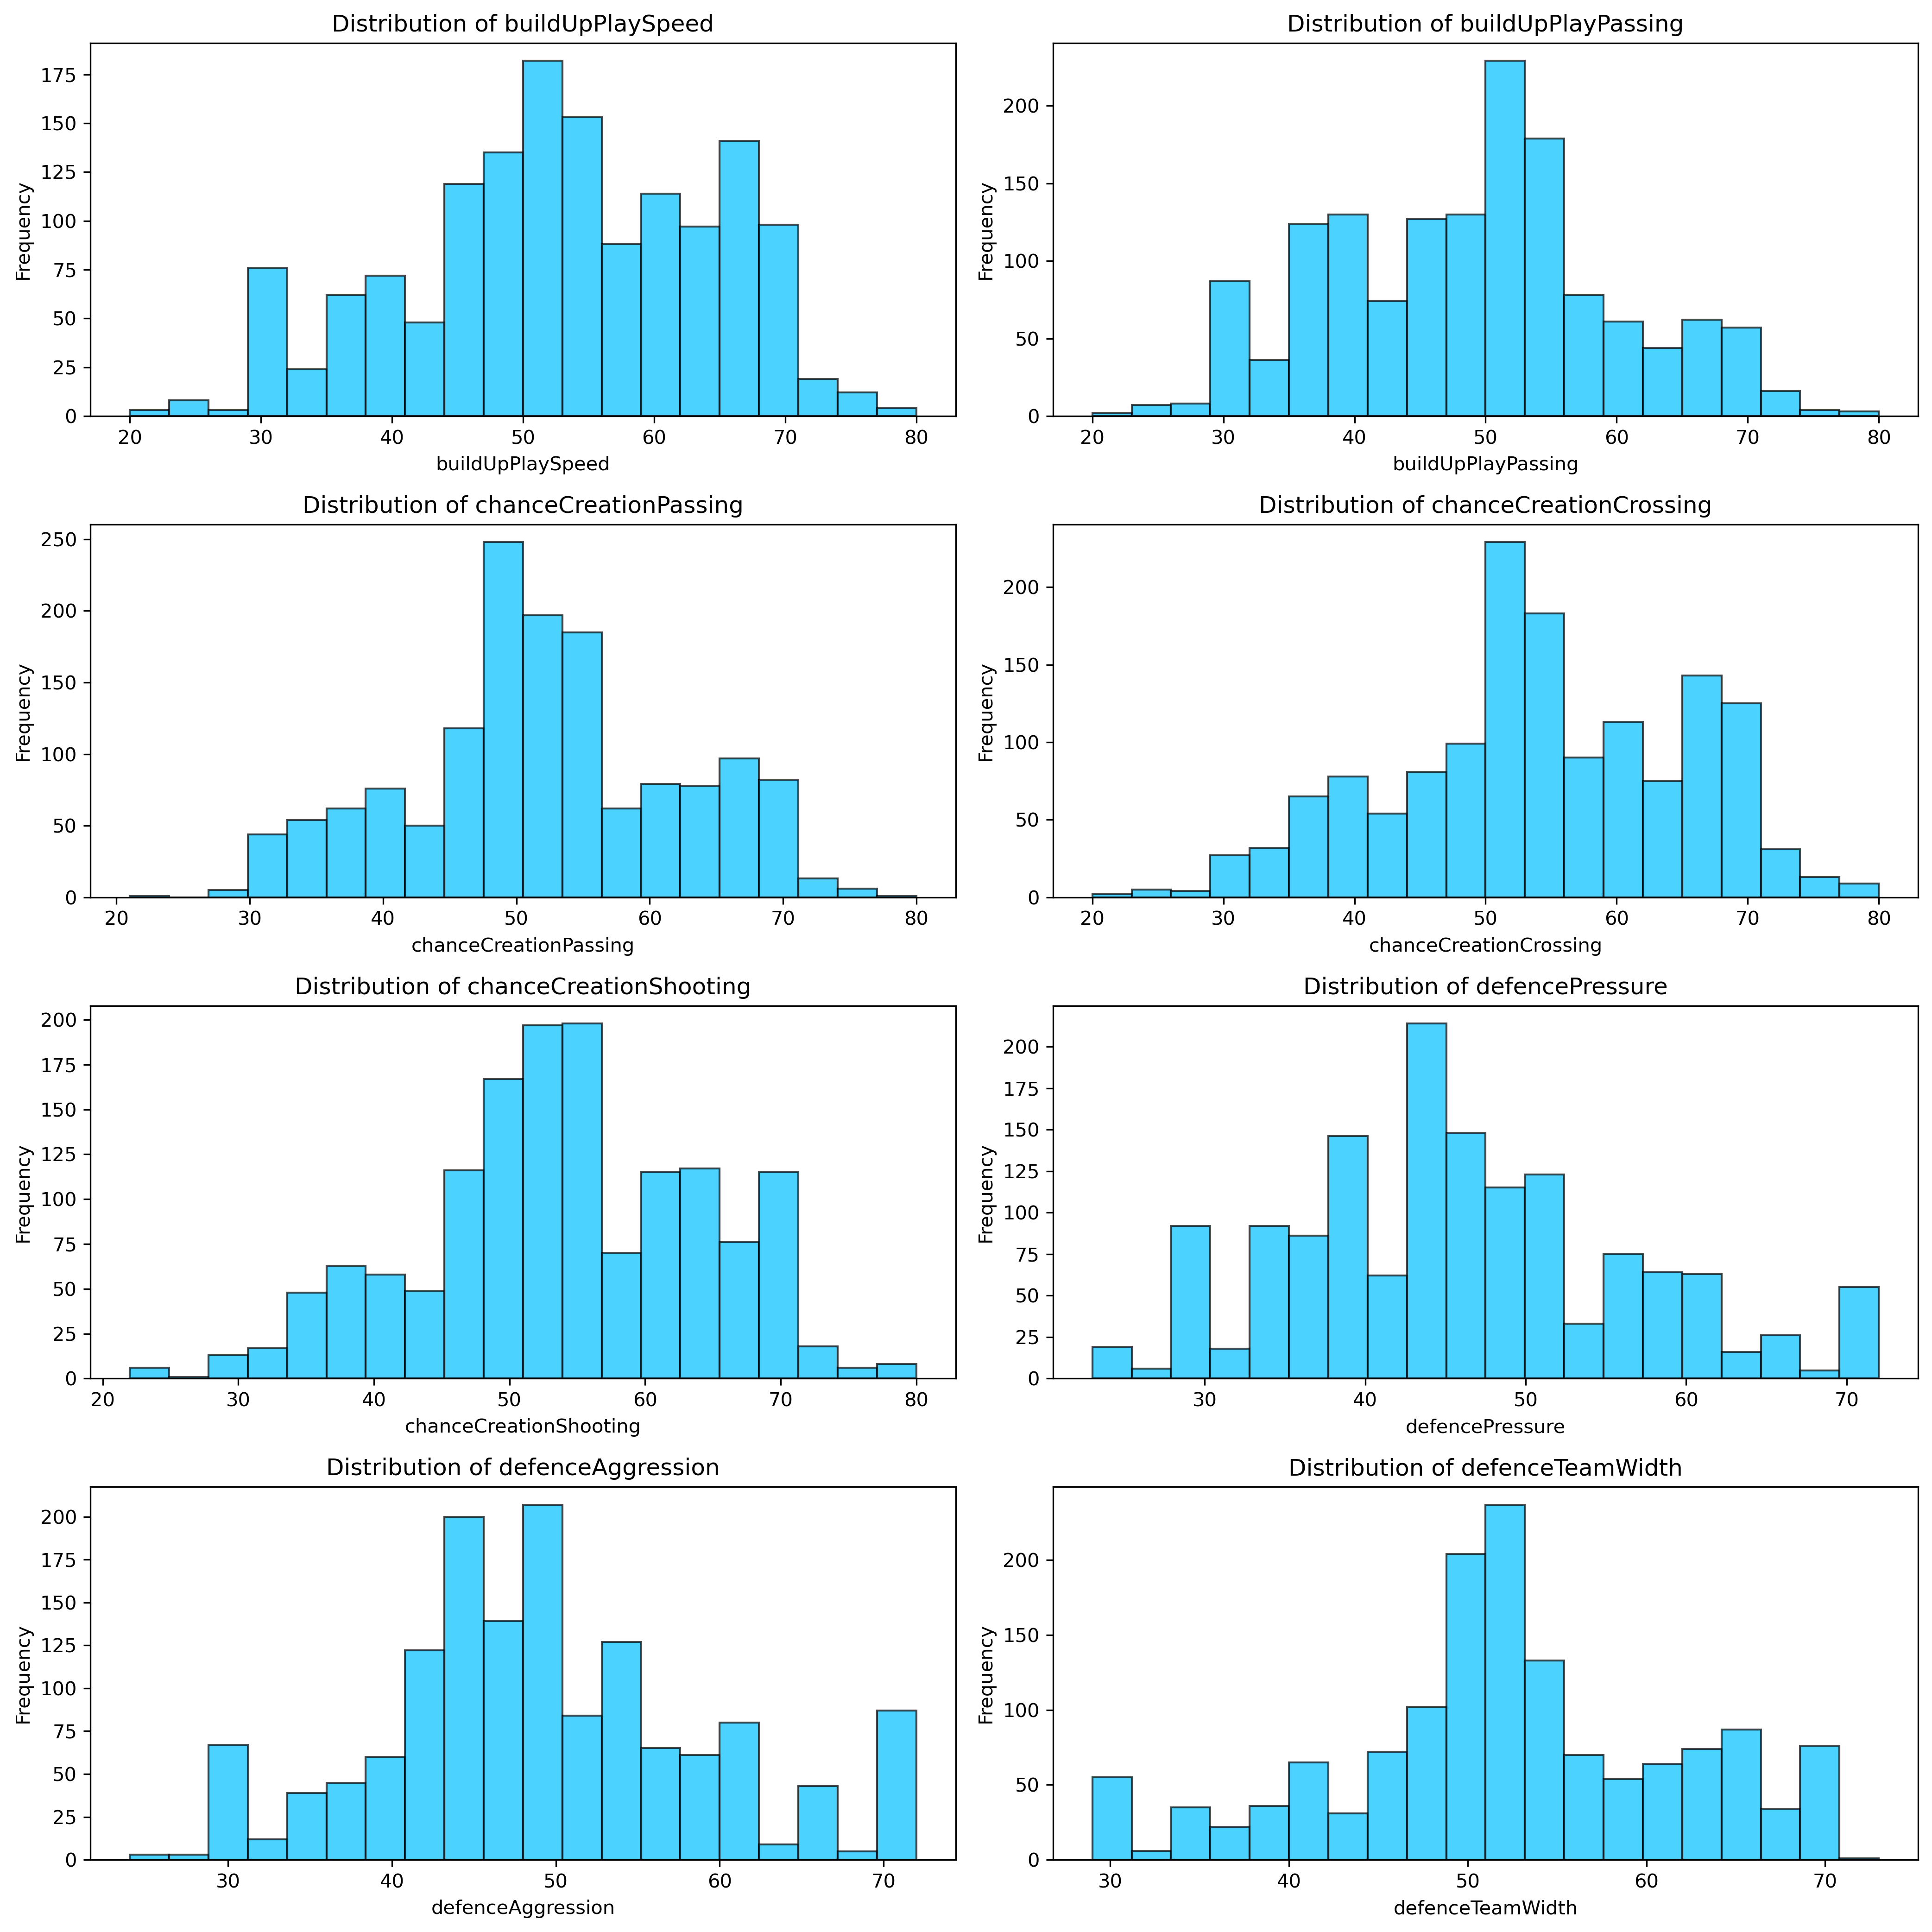

In [17]:
# List of columns to plot
columns_to_plot = [
    'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 
    'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]

# Create a figure and axes
fig, axes = plt.subplots(4, 2, figsize=(14, 14), dpi=300)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    team_attributes_df[column].plot(kind='hist', bins=20, color='deepskyblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

## expenditure_df

### Histograms

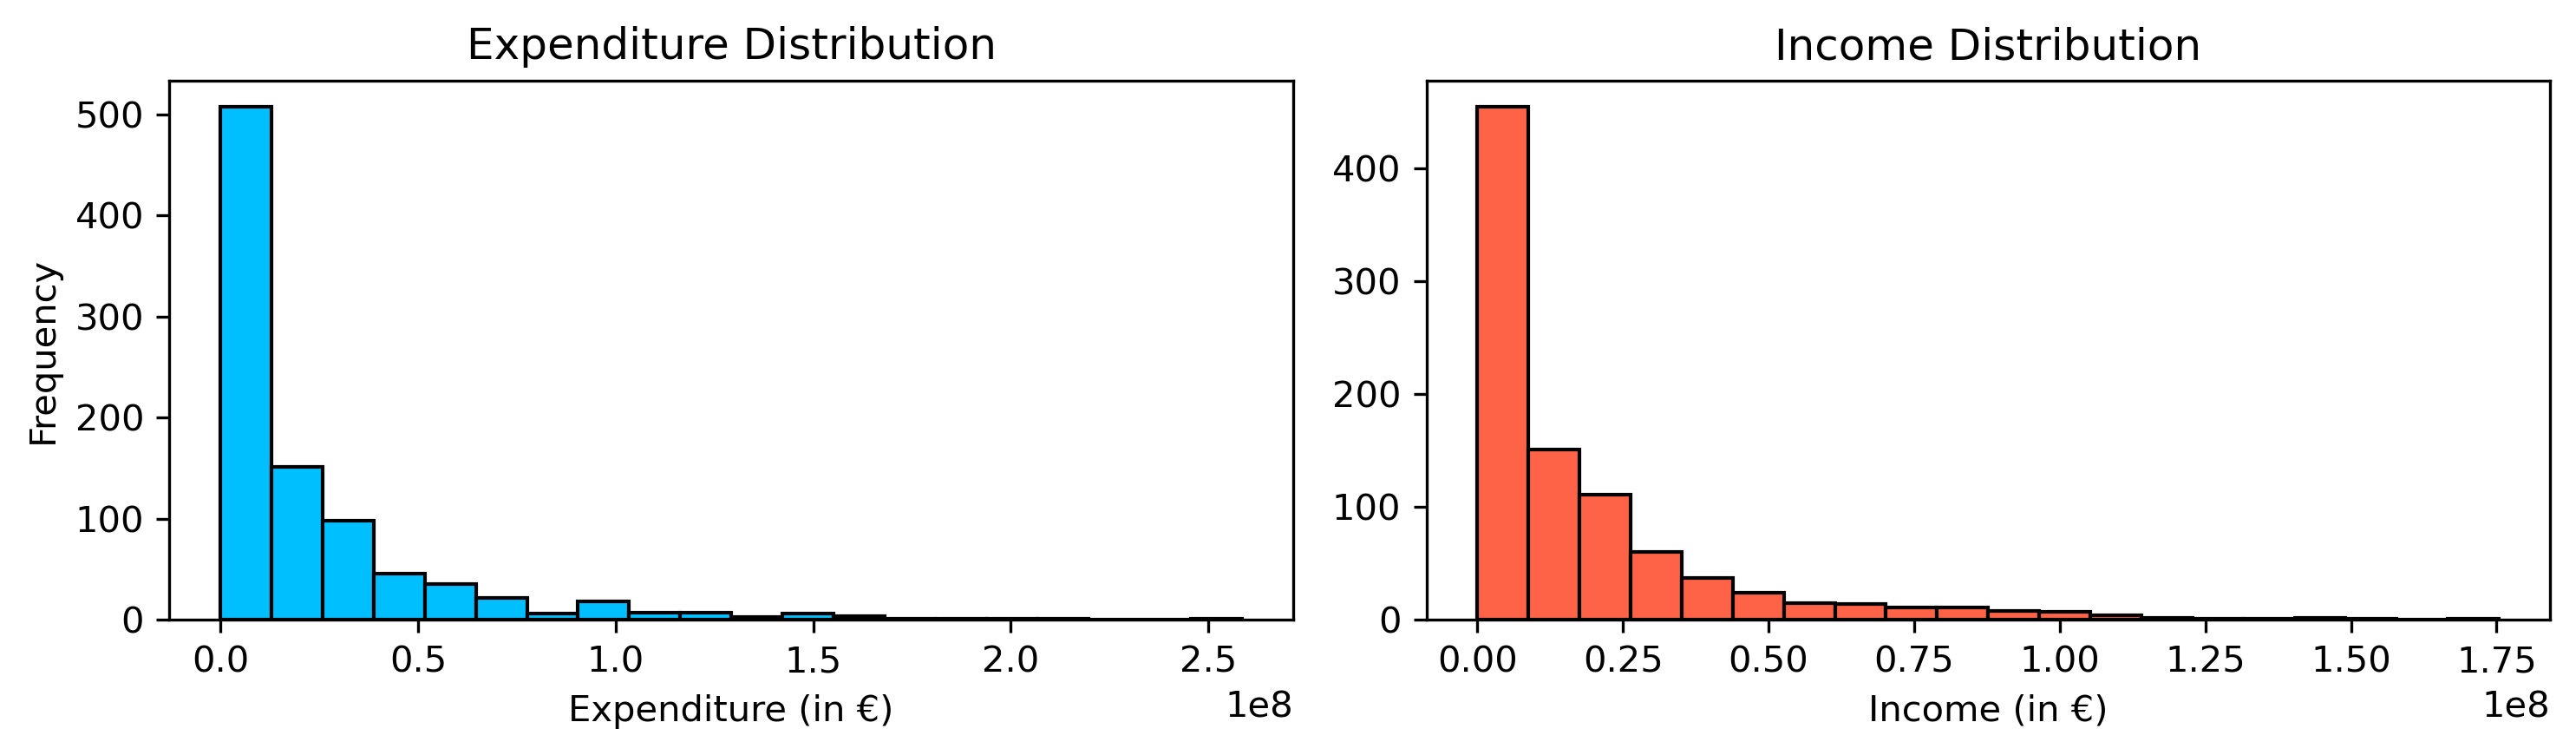

In [20]:
# Set up the figure
plt.figure(figsize=(10, 3), dpi=300)

# Plot histogram for Expenditure
plt.subplot(1, 2, 1)
plt.hist(expenditure_df['Expenditure'], bins=20, color='deepskyblue', edgecolor='black')
plt.title("Expenditure Distribution")
plt.xlabel("Expenditure (in €)")
plt.ylabel("Frequency")

# Plot histogram for Income
plt.subplot(1, 2, 2)
plt.hist(expenditure_df['Income'], bins=20, color='tomato', edgecolor='black')
plt.title("Income Distribution")
plt.xlabel("Income (in €)")

# Display
plt.tight_layout()
plt.show()

### Top 10 teams by expenditure

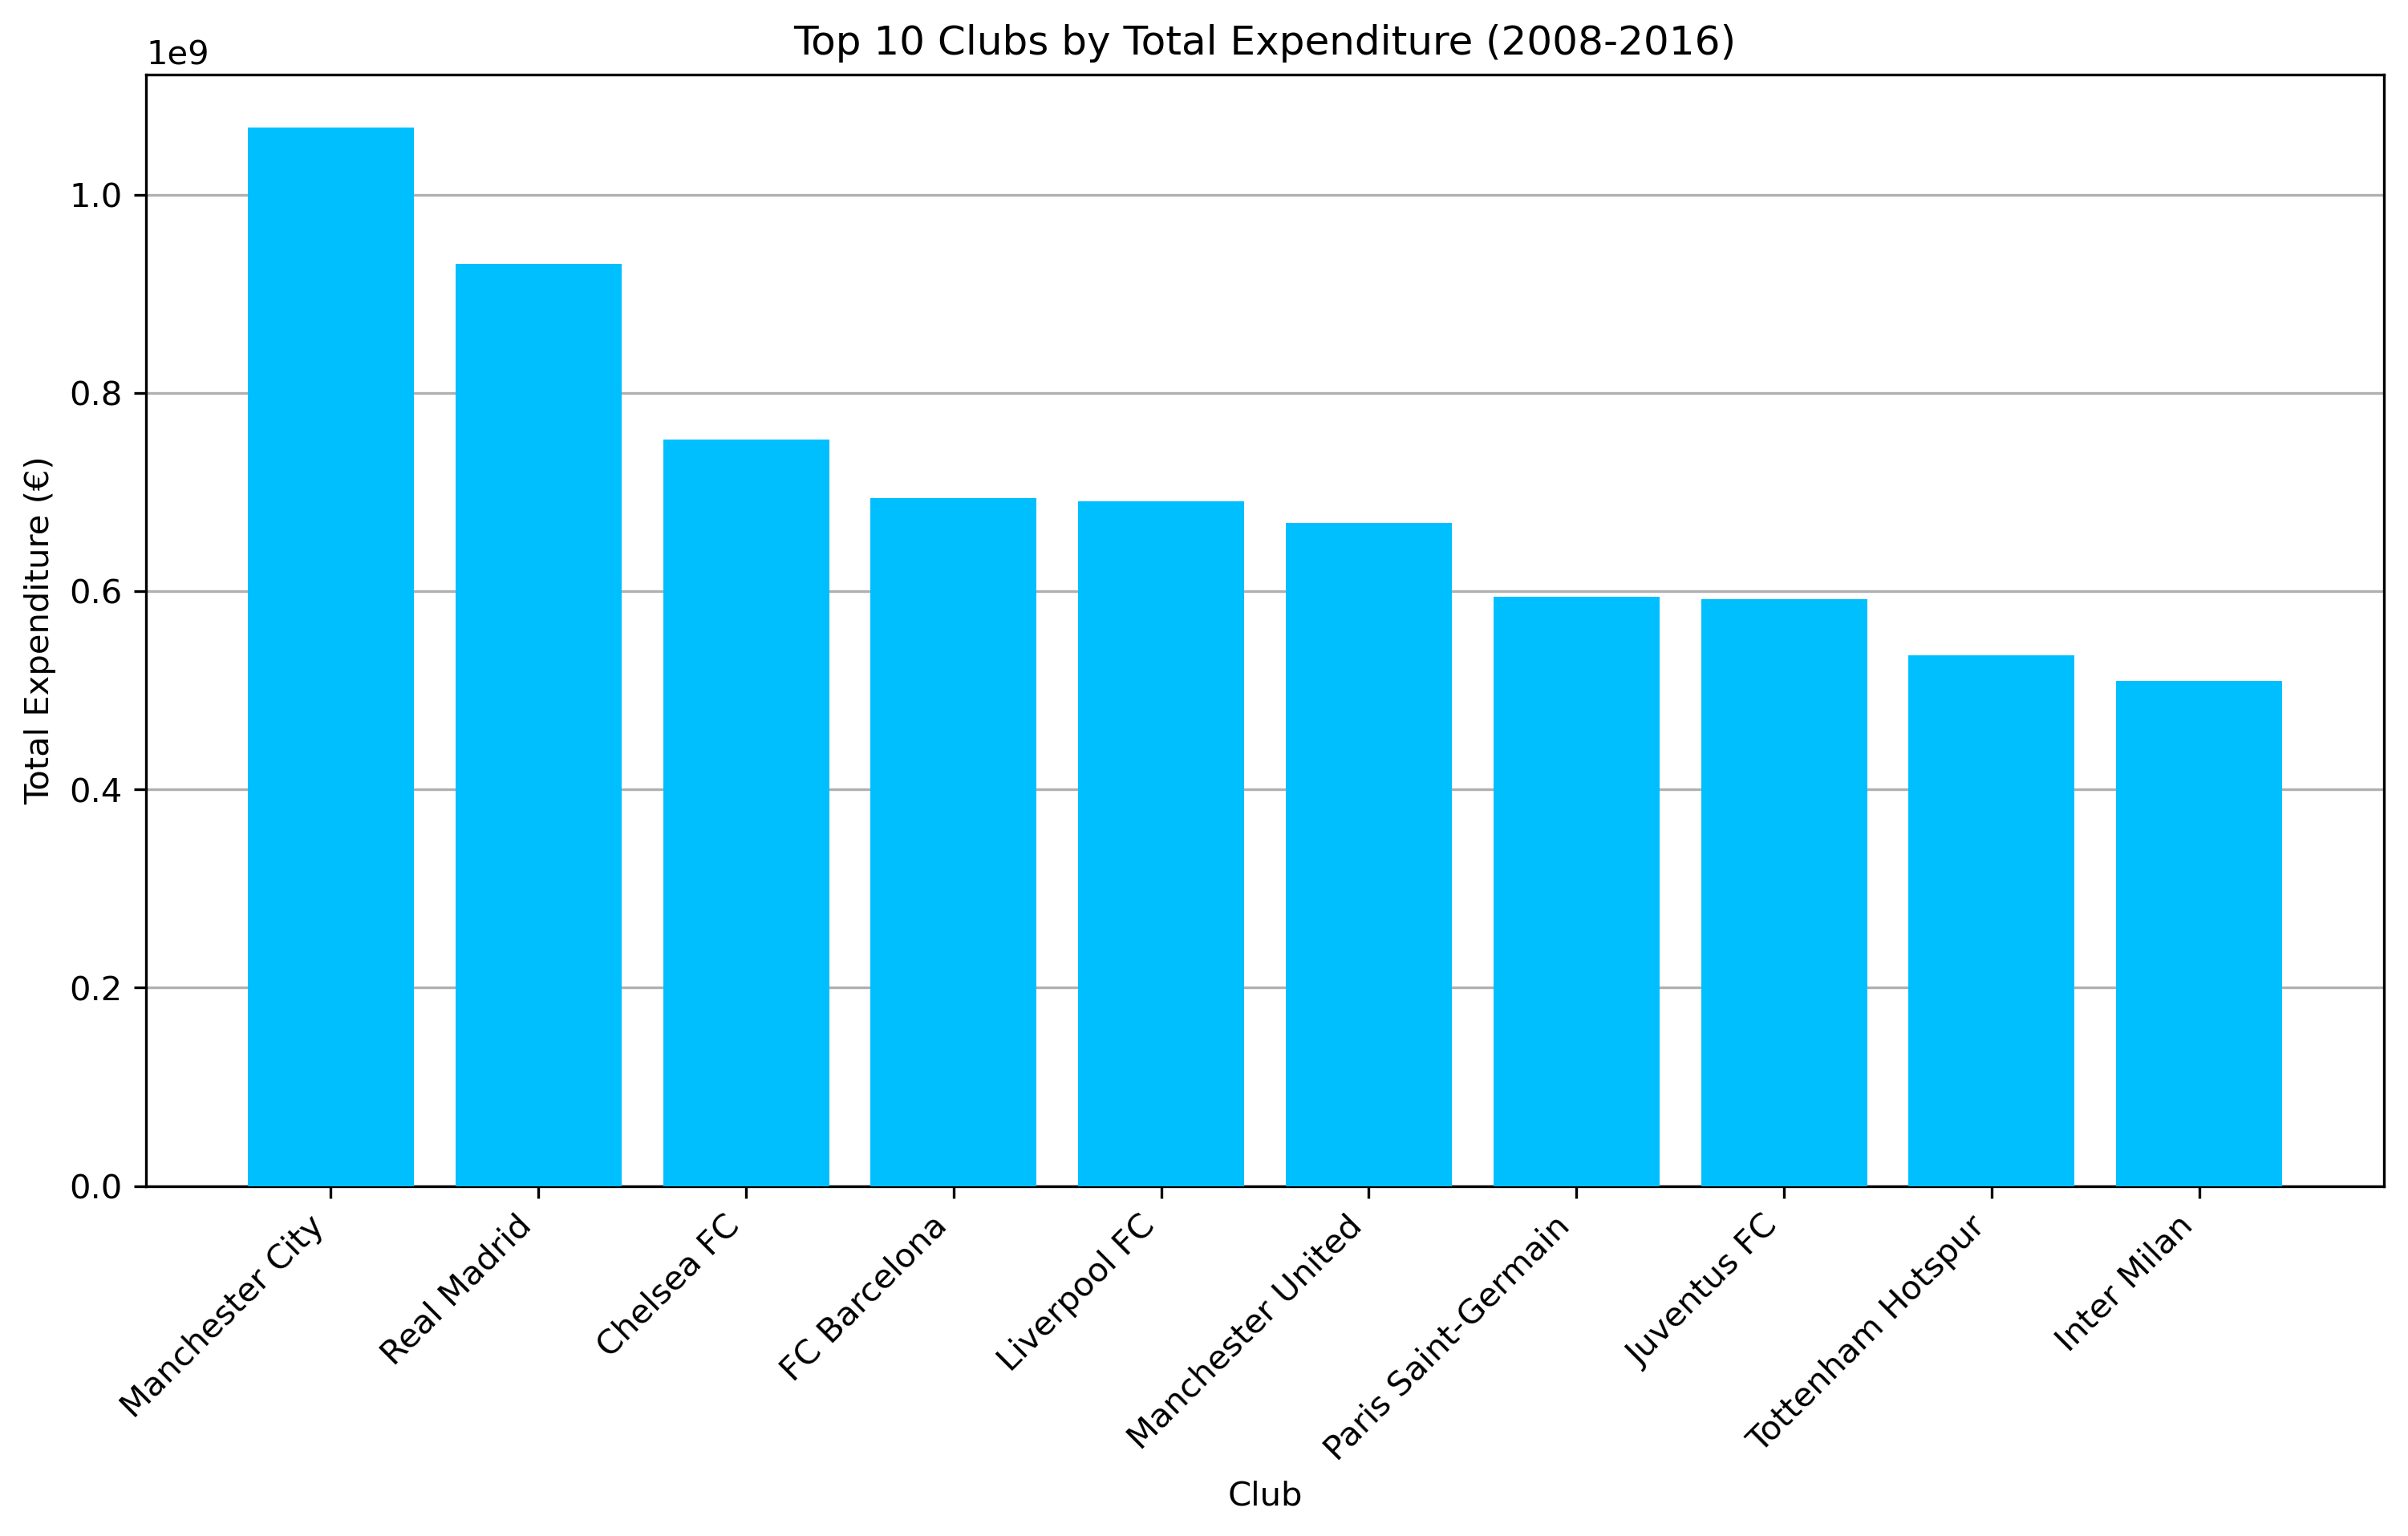

In [22]:
# Group by 'Club' and sum the 'Expenditure'
club_expenditure = expenditure_df.groupby('Club', as_index=False)['Expenditure'].sum()

# Sort by total expenditure in descending order and select the top 10
top_10_clubs = club_expenditure.sort_values(by='Expenditure', ascending=False).head(10)

# Plot the top 10 clubs by total expenditure
fig = plt.figure(figsize=(12, 6), dpi=300)
plt.bar(top_10_clubs['Club'], top_10_clubs['Expenditure'], zorder=3, color='deepskyblue')
plt.title('Top 10 Clubs by Total Expenditure (2008-2016)')
plt.xlabel('Club')
plt.ylabel('Total Expenditure (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', zorder=1)

# Display
plt.show()

### Bottom 10 teams by expenditure

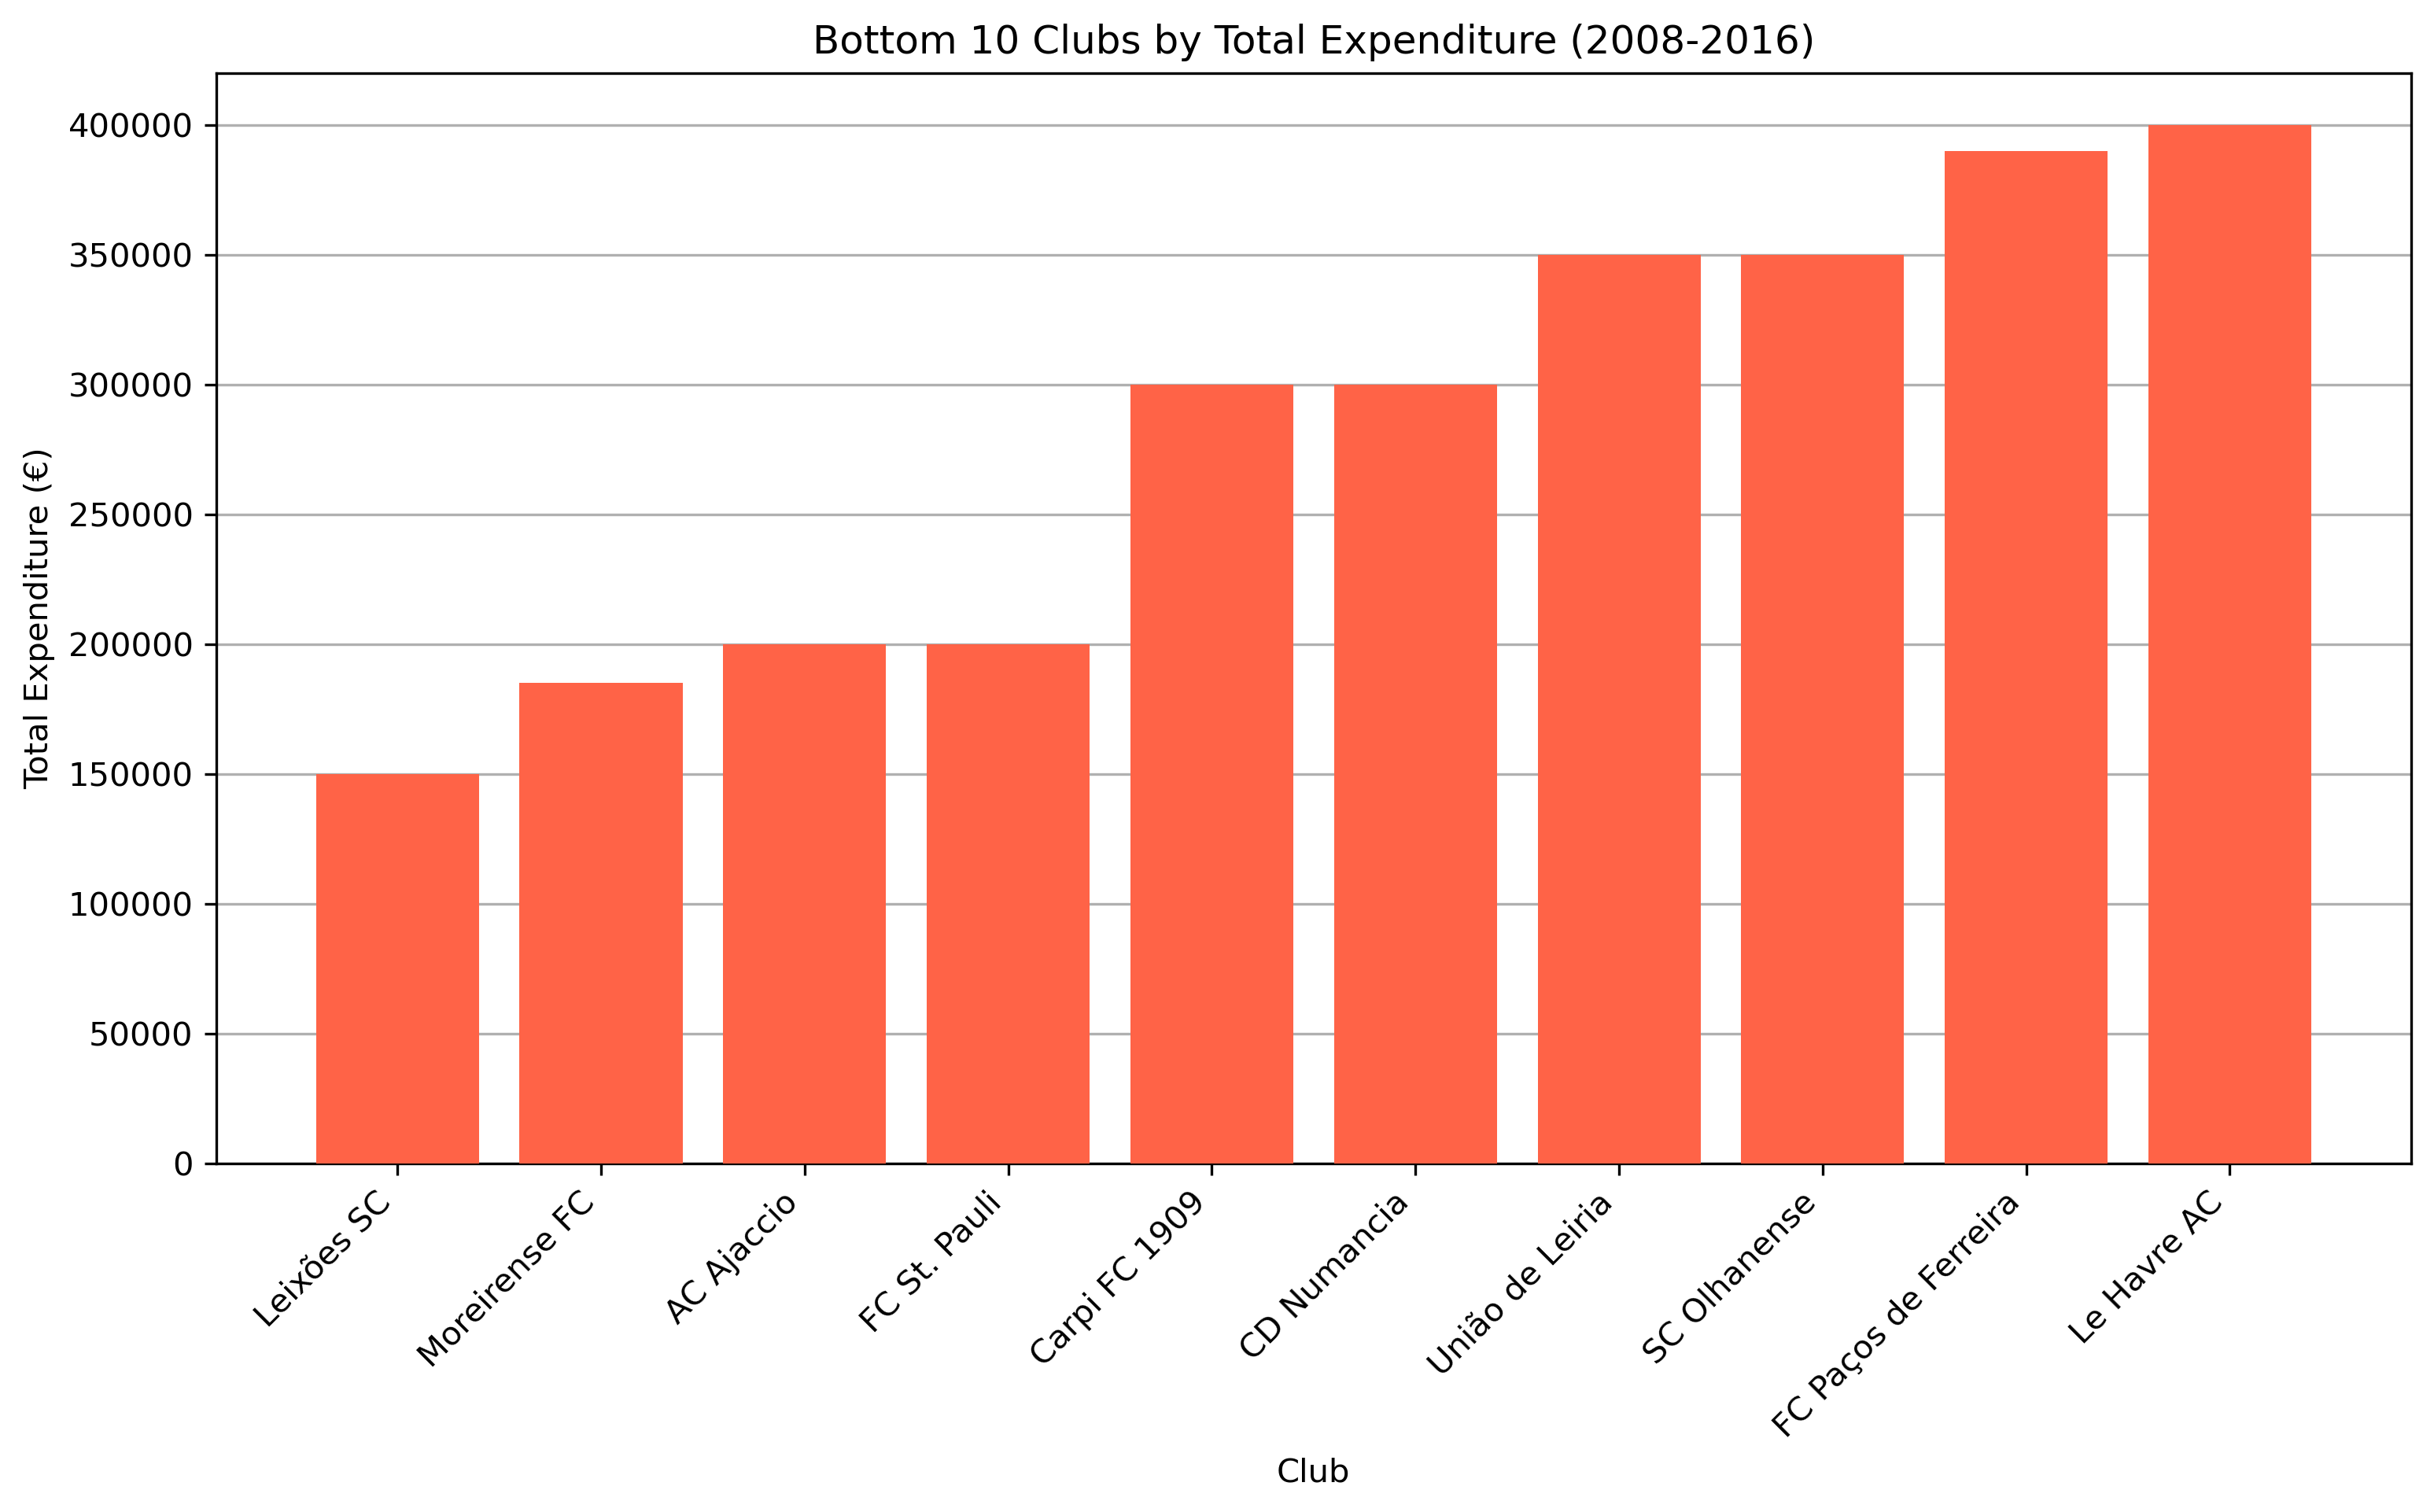

In [24]:
# Remove rows where Expenditure is 0
expenditure_df = expenditure_df[expenditure_df['Expenditure'] != 0]

# Group by 'Club' and sum the 'Expenditure'
club_expenditure = expenditure_df.groupby('Club', as_index=False)['Expenditure'].sum()

# Sort by total expenditure in ascending order and select the bottom 10
bottom_10_clubs = club_expenditure.sort_values(by='Expenditure', ascending=True).head(10)

# Plot the bottom 10 clubs by total expenditure
fig = plt.figure(figsize=(12, 6), dpi=300)
plt.bar(bottom_10_clubs['Club'], bottom_10_clubs['Expenditure'], zorder=3, color='tomato')
plt.title('Bottom 10 Clubs by Total Expenditure (2008-2016)')
plt.xlabel('Club')
plt.ylabel('Total Expenditure (€)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', zorder=1)

# Display
plt.show()

### Total expenditure by league

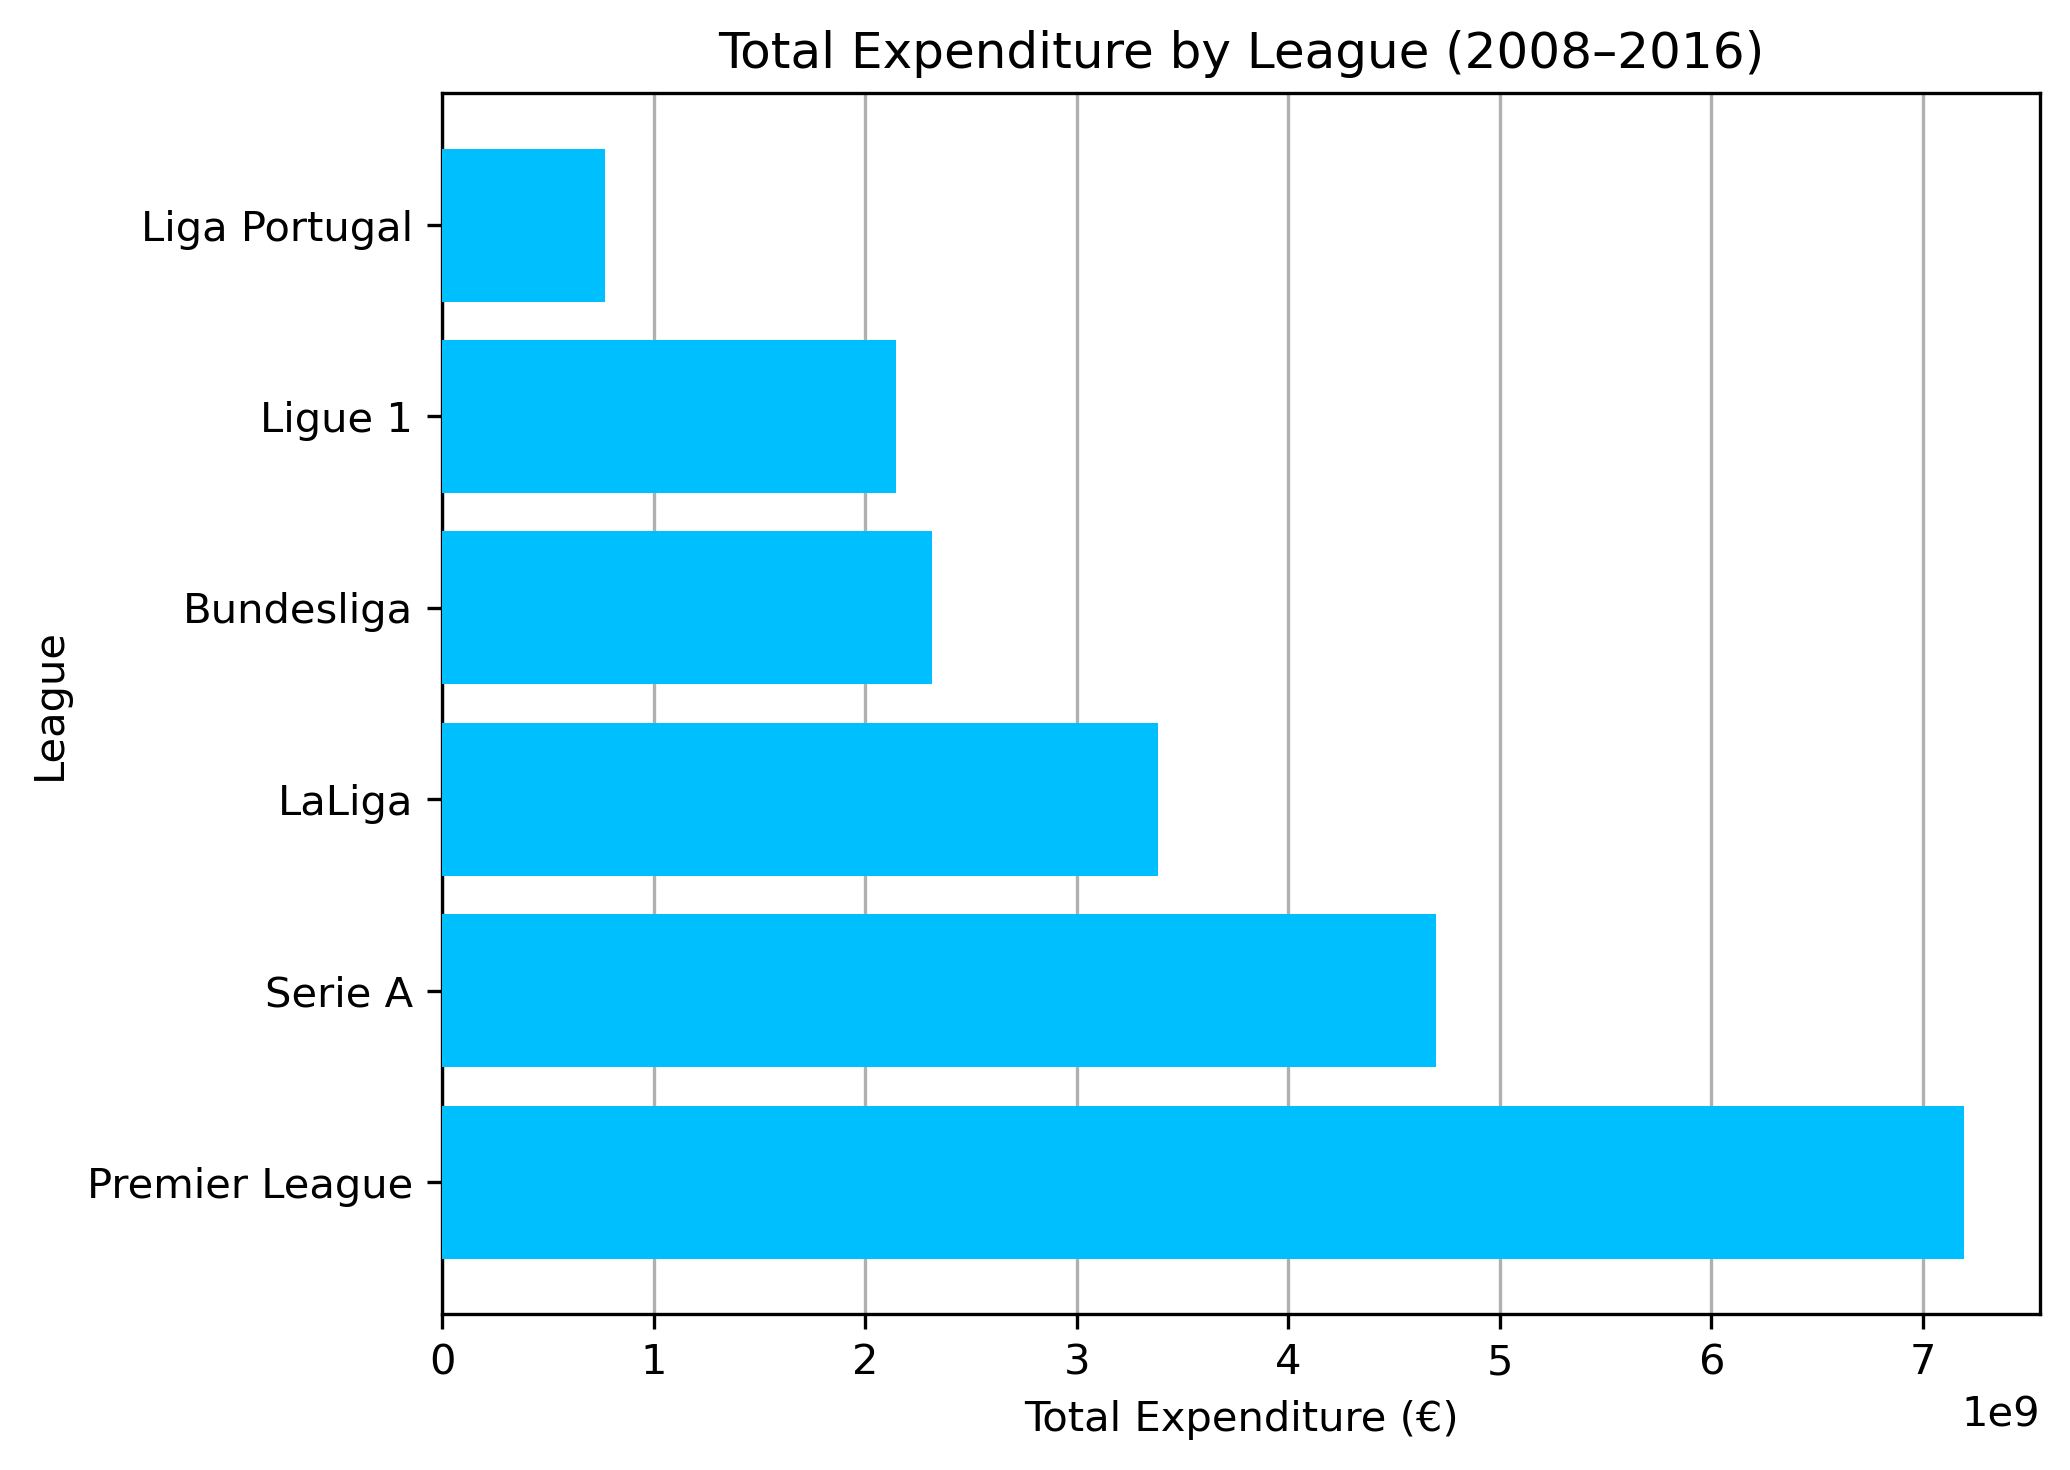

In [26]:
# Group by 'League' and sum the 'Expenditure'
league_expenditure = expenditure_df.groupby('league', as_index=False)['Expenditure'].sum()

# Sort by total expenditure in descending order for better visualization
league_expenditure = league_expenditure.sort_values(by='Expenditure', ascending=False)

# Plot the total expenditure by league (horizontal bars)
fig = plt.figure(figsize=(7, 5), dpi=300)
plt.barh(league_expenditure['league'], league_expenditure['Expenditure'], color='deepskyblue', zorder=3)
plt.title('Total Expenditure by League (2008–2016)')
plt.xlabel('Total Expenditure (€)')
plt.ylabel('League')
plt.grid(axis='x', zorder=1)

# Show the plot
plt.tight_layout()
plt.show()

## matches_df

In [28]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Columns: 1072 entries, id to away_team_num_attackers
dtypes: float64(946), int64(21), object(105)
memory usage: 136.1+ MB


In [29]:
matches_df.describe()

id    country_id     league_id         stage  match_api_id  \
count  16637.000000  16637.000000  16637.000000  16637.000000  1.663700e+04   
mean   11717.181884  10304.251067  10304.251067     18.775260  1.204412e+06   
std     7043.049212   7040.811120   7040.811120     10.657606  4.959022e+05   
min     1729.000000   1729.000000   1729.000000      1.000000  4.831290e+05   
25%     5888.000000   4769.000000   4769.000000     10.000000  8.298960e+05   
50%    10047.000000   7809.000000   7809.000000     19.000000  1.216887e+06   
75%    18574.000000  17642.000000  17642.000000     28.000000  1.709800e+06   
max    24557.000000  21518.000000  21518.000000     38.000000  2.118418e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count      16637.000000      16637.000000    16637.000000    16637.000000   
mean       10060.950171      10061.128148        1.523051        1.138366   
std        12461.406490      12461.393340        1.282533        1.132629   
min         2033.000000       2033.000000        0.000000        0.000000   
25%         8533.000000       8533.000000        1.000000        0.000000   
50%         8697.000000       8697.000000        1.000000        1.000000   
75%         9874.000000       9874.000000        2.000000        2.000000   
max       208931.000000     208931.000000       10.000000        9.000000   

       home_player_X1  ...  home_team_draws  away_team_draws  \
count    16533.000000  ...     16637.000000     16637.000000   
mean         0.999940  ...         4.634730         4.641221   
std          0.013471  ...         3.392133         3.397270   
min          0.000000  ...         0.000000         0.000000   
25%          1.000000  ...         2.000000         2.000000   
50%          1.000000  ...         4.000000         4.000000   
75%          1.000000  ...         7.000000         7.000000   
max          2.000000  ...        19.000000        19.000000   

       home_team_losses  away_team_losses  home_team_num_defenders  \
count      16637.000000      16637.000000             16637.000000   
mean           6.607020          6.513133                 3.926008   
std            4.986099          4.969578                 0.352397   
min            0.000000          0.000000                 1.000000   
25%            2.000000          2.000000                 4.000000   
50%            6.000000          6.000000                 4.000000   
75%           10.000000         10.000000                 4.000000   
max           27.000000         26.000000                 6.000000   

       home_team_num_midfielders  home_team_num_attackers  \
count               16637.000000             16637.000000   
mean                    4.366232                 1.707519   
std                     0.829384                 0.749962   
min                     0.000000                 1.000000   
25%                     4.000000                 1.000000   
50%                     5.000000                 2.000000   
75%                     5.000000                 2.000000   
max                     8.000000                 3.000000   

       away_team_num_defenders  away_team_num_midfielders  \
count             16637.000000               16637.000000   
mean                  3.926369                   4.390936   
std                   0.364874                   0.836881   
min                   1.000000                   3.000000   
25%                   4.000000                   4.000000   
50%                   4.000000                   5.000000   
75%                   4.000000                   5.000000   
max                   5.000000                   8.000000   

       away_team_num_attackers  
count             16637.000000  
mean                  1.682274  
std                   0.755540  
min                   1.000000  
25%                   1.000000  
50%                   2.000000  
75%                   2.000000  
max                   3.000000  

[8 ro

In [30]:
# Count NaNs in each column
nan_counts = matches_df.isna().sum()

# Filter and display columns with NaNs greater than 0
columns_with_nans = nan_counts[nan_counts > 0]
print("Columns with NaN values in team_attributes_df:")
print(columns_with_nans.to_string())

Columns with NaN values in team_attributes_df:
home_player_X1                          104
home_player_X2                          104
home_player_X3                          106
home_player_X4                          106
home_player_X5                          106
home_player_X6                          106
home_player_X7                          106
home_player_X8                          106
home_player_X9                          106
home_player_X10                         106
home_player_X11                         106
away_player_X1                          106
away_player_X2                          106
away_player_X3                          106
away_player_X4                          106
away_player_X5                          106
away_player_X6                          106
away_player_X7                          106
away_player_X8                          106
away_player_X9                          107
away_player_X10                         107
away_player_X11              

### Number of matches in each season

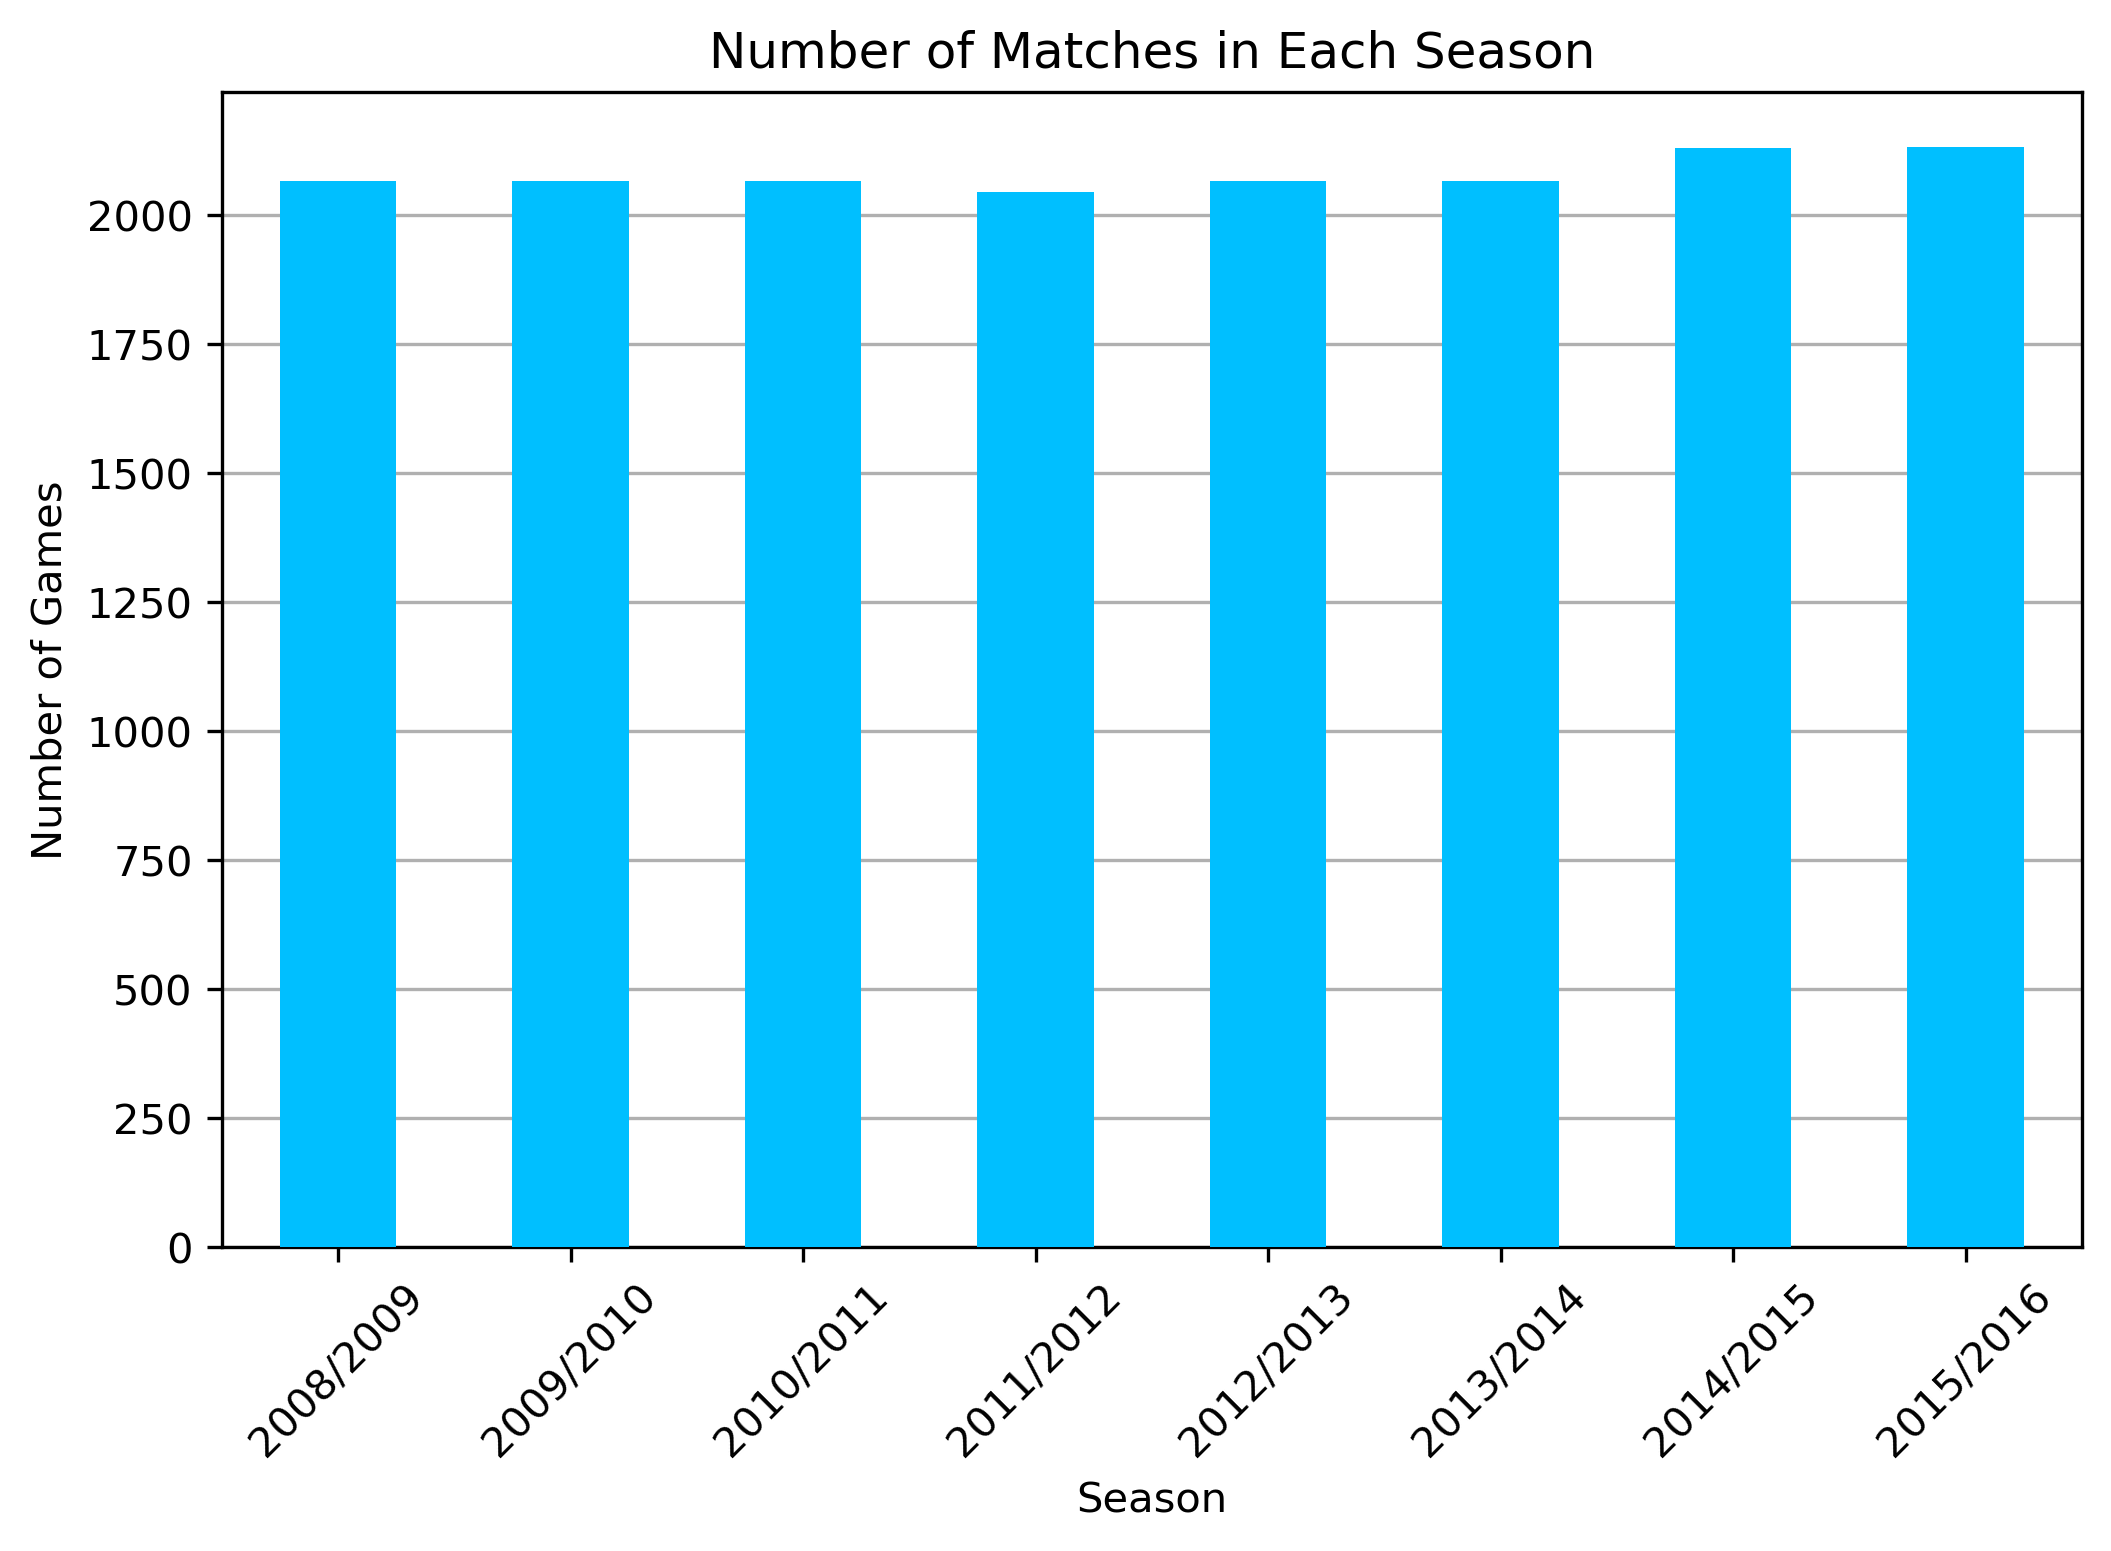

In [32]:
# Count the number of games in each season
games_per_season = matches_df['season'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5), dpi=300)
games_per_season.plot(kind='bar', zorder=3, color='deepskyblue')
plt.title("Number of Matches in Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.grid(axis='y', zorder=1)
plt.show()

### Average goals scored by home and away teams each season

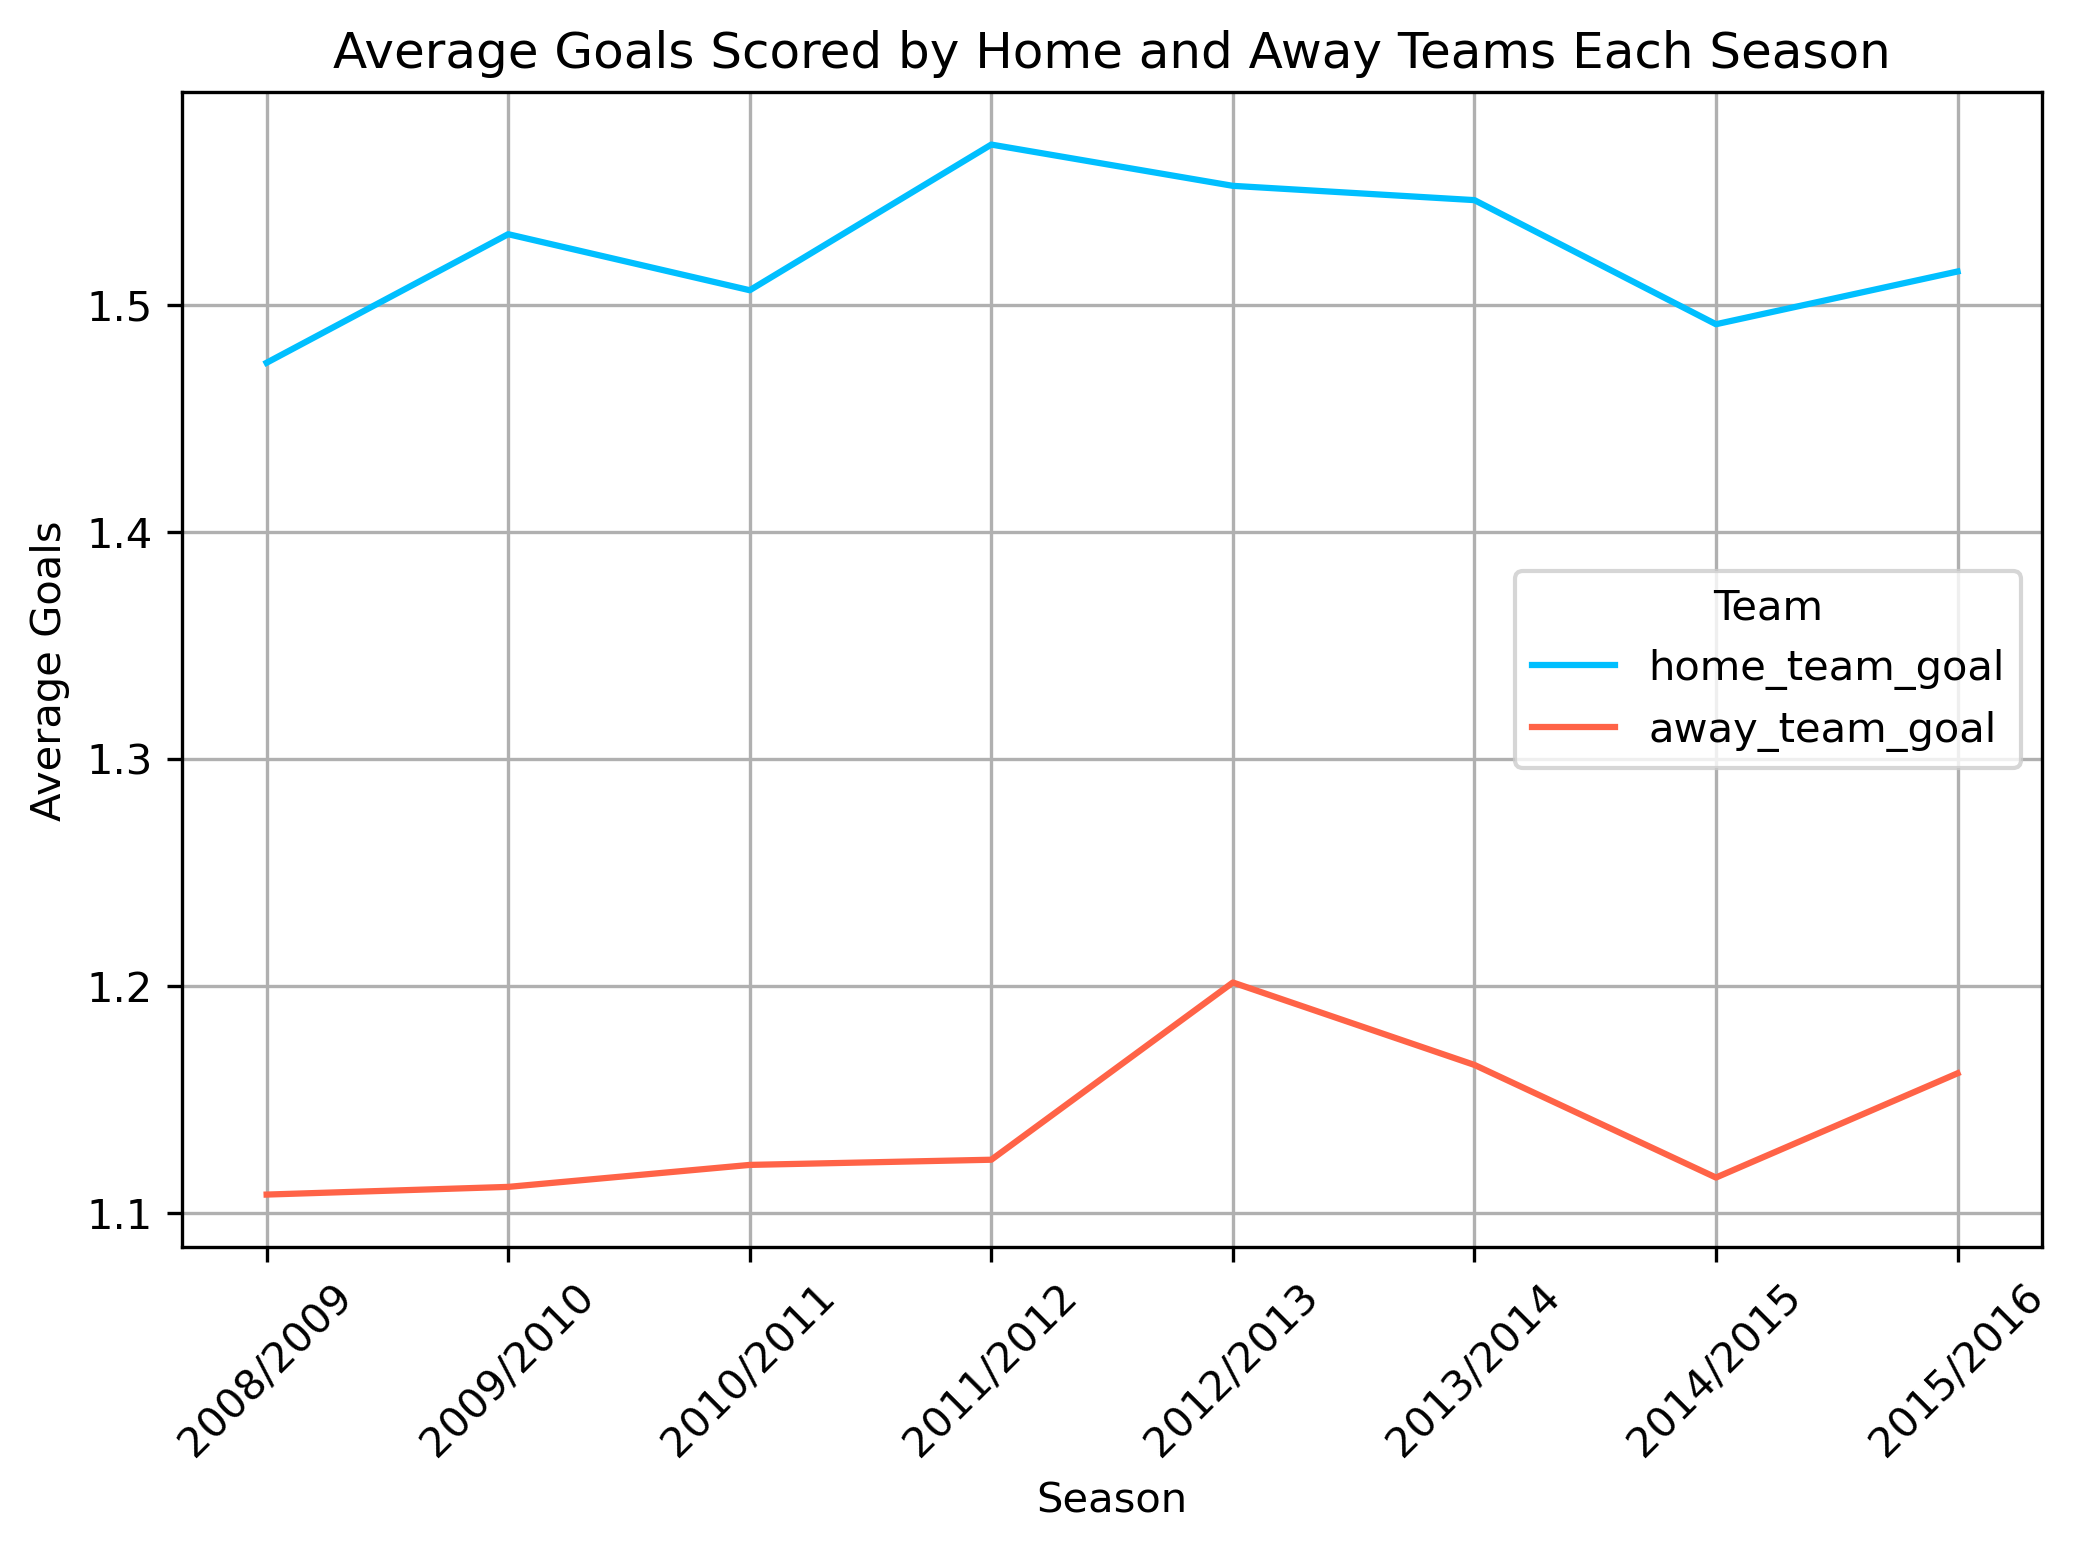

In [34]:
# Average goals scored by home and away teams each season
goals_by_season = matches_df.groupby('season')[['home_team_goal', 'away_team_goal']].mean()

# Plot
plt.figure(figsize=(8, 5), dpi=300)
goals_by_season.plot(kind='line', ax=plt.gca(), color=['deepskyblue', 'tomato'])

# Add title and labels
plt.title("Average Goals Scored by Home and Away Teams Each Season")
plt.xlabel("Season")
plt.ylabel("Average Goals")
plt.xticks(rotation=45)
plt.legend(title="Team")
plt.grid(True)

# Display
plt.show()

### Total goals scored

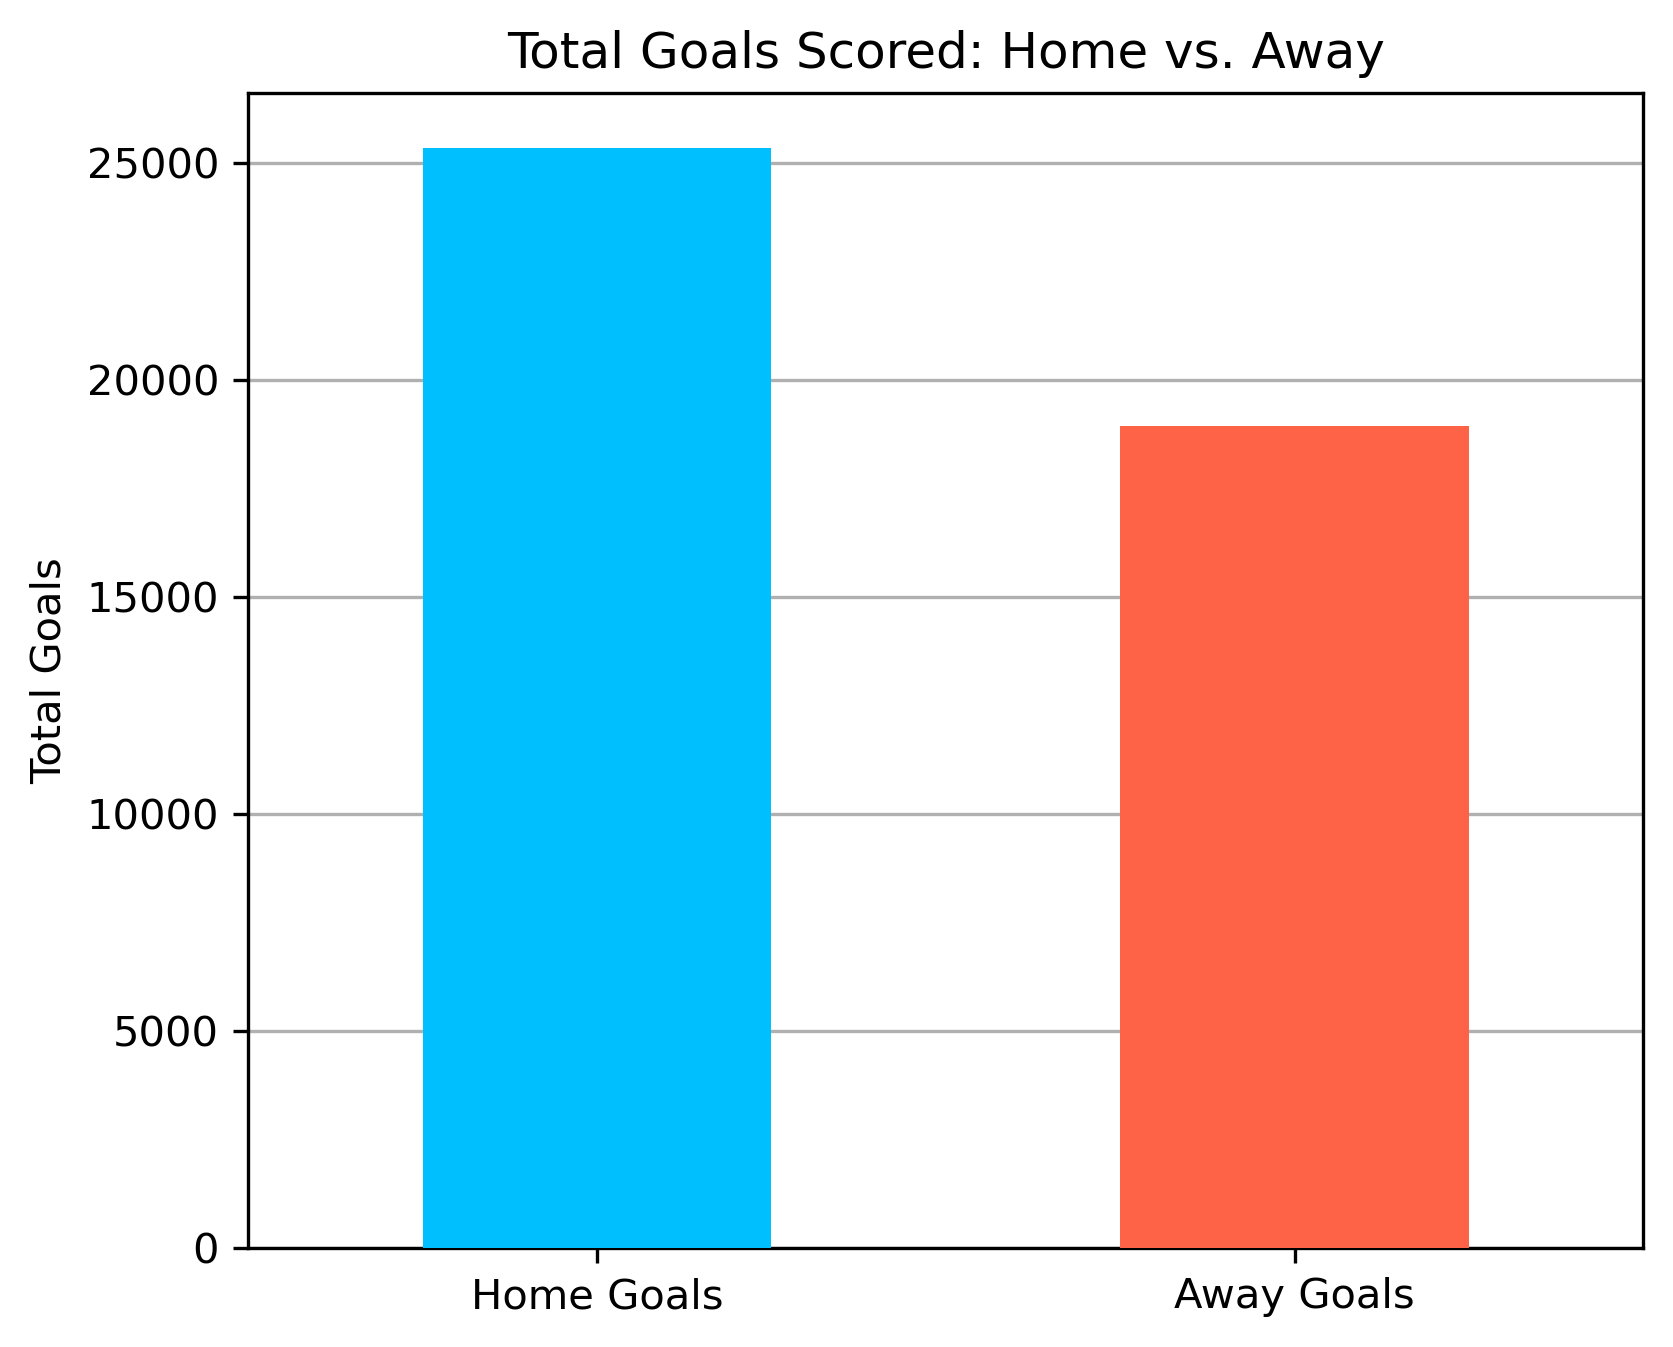

In [36]:
# Compare total goals scored at Home vs. Away
total_goals = matches_df[['home_team_goal', 'away_team_goal']].sum()
total_goals.index = ['Home Goals', 'Away Goals']

# Create the bar plot
plt.figure(figsize=(6, 5), dpi=300)
total_goals.plot(kind='bar', zorder=3, color=['deepskyblue', 'tomato'])

# Add title and labels
plt.title("Total Goals Scored: Home vs. Away")
plt.ylabel("Total Goals")
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=1)
plt.savefig("/Users/nyahbay/Desktop/CME538/Big_Project/Figures/home_away_goals.png", bbox_inches='tight')

# Display
plt.show()

### Match results

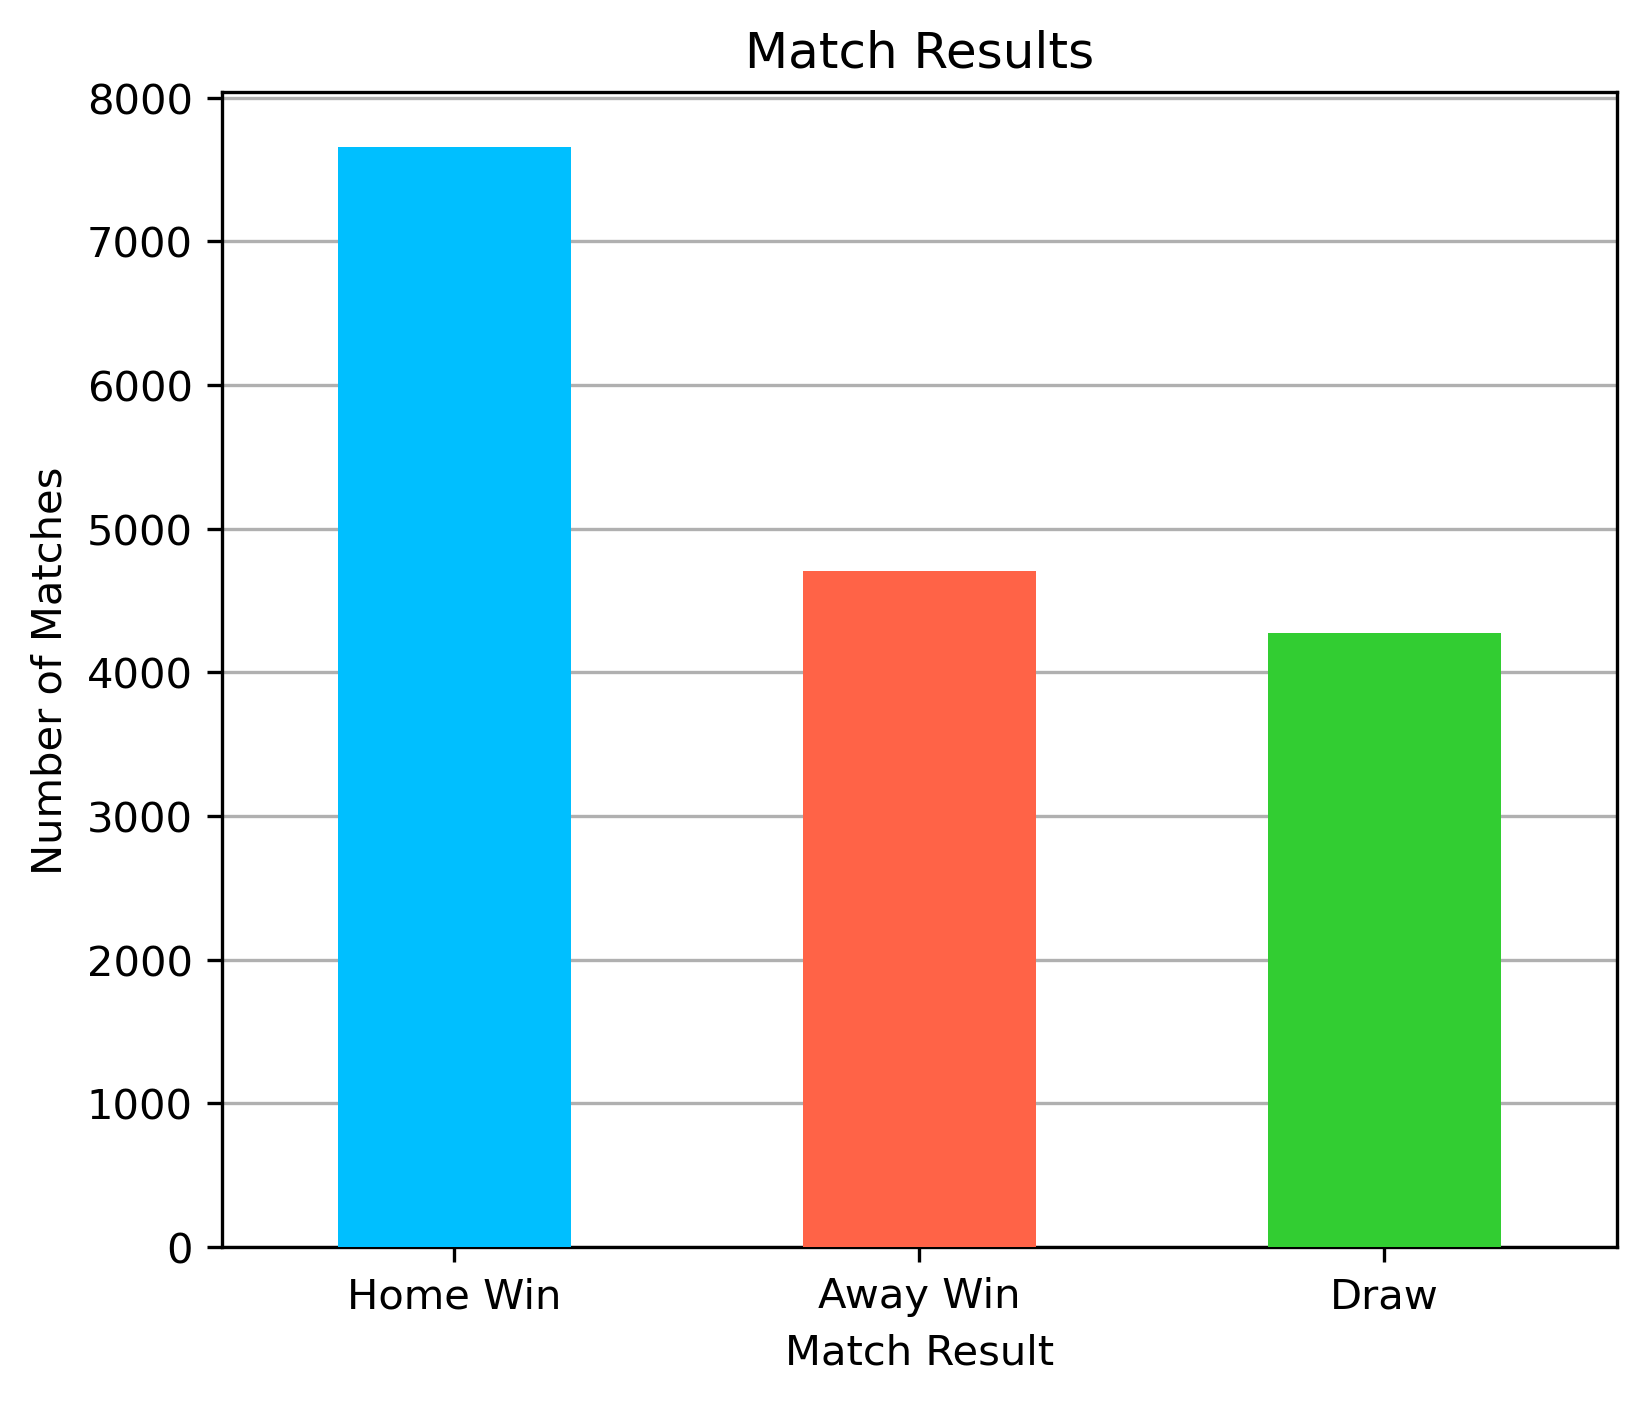

In [38]:
# Plot the match result distribution
plt.figure(figsize=(6, 5), dpi=300)
matches_df['match_result'].value_counts().plot(kind='bar', zorder=3, color=['deepskyblue', 'tomato', 'limegreen'])

# Add title and labels
plt.title("Match Results")
plt.ylabel("Number of Matches")
plt.xlabel("Match Result")
plt.xticks(rotation=0)
plt.grid(axis='y', zorder=1)

# Display the plot
plt.show()

### Betting odds and true outcome

       match_result
B365A  Away Win        2224
       Draw            1146
       Home Win        1015
B365H  Away Win        2482
       Draw            3122
       Home Win        6628
dtype: int64


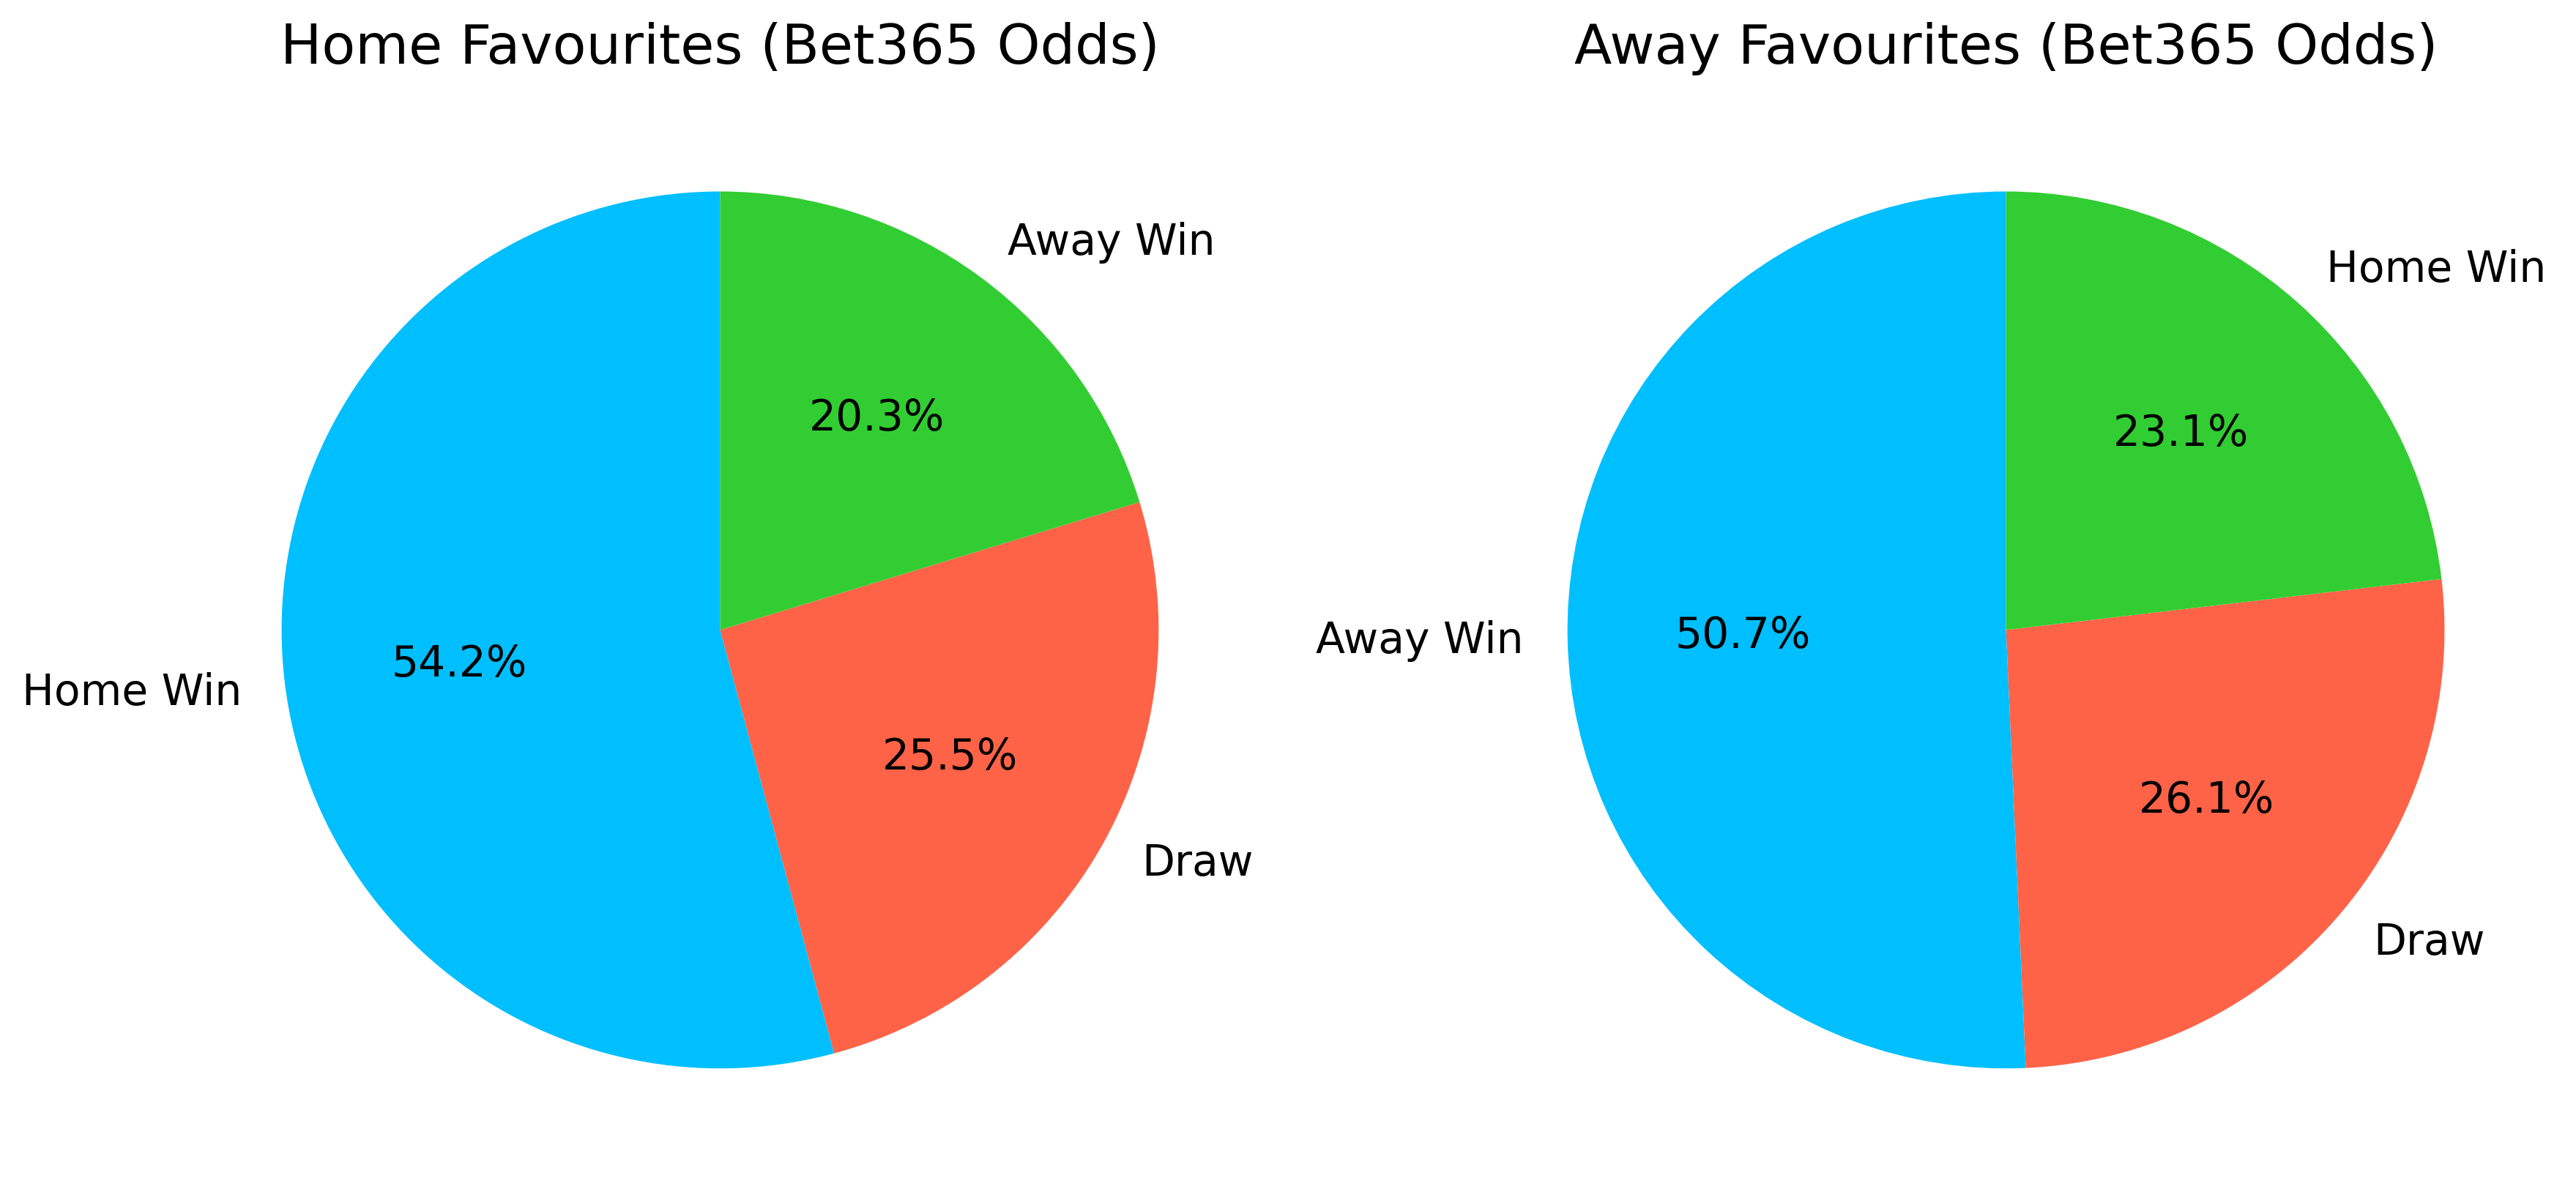

In [40]:
# Drop rows with NaNs in B365H or B365A
matches_df = matches_df.dropna(subset=['B365H', 'B365A'])

# Calculate the favorite team
favorite_team = matches_df[['B365H', 'B365A']].idxmin(axis=1)

# Group by favorite team and match result to see the distribution
favorite_team_distribution = matches_df.groupby([favorite_team, matches_df['match_result']]).size()
print(favorite_team_distribution)

# Count matches where the favorite team won
favorite_wins = matches_df[(favorite_team == 'B365H') & 
                               (matches_df['match_result'] == 'Home Win')].shape[0]
underdog_wins = matches_df[(favorite_team == 'B365A') & 
                               (matches_df['match_result'] == 'Away Win')].shape[0]

# Calculate proportions of match results for home and away favorites
home_favorites = matches_df[favorite_team == 'B365H']['match_result'].value_counts()
away_favorites = matches_df[favorite_team == 'B365A']['match_result'].value_counts()

# Plot pie charts for home and away favorites
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

# Pie chart for home favorites
axes[0].pie(
    home_favorites,
    labels=home_favorites.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['deepskyblue', 'tomato', 'limegreen'],
    textprops={'fontsize': 14}
)
axes[0].set_title("Home Favourites (Bet365 Odds)", fontsize=18)

# Pie chart for away favorites
axes[1].pie(
    away_favorites,
    labels=away_favorites.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['deepskyblue', 'tomato', 'limegreen'],
    textprops={'fontsize': 14}
)
axes[1].set_title("Away Favourites (Bet365 Odds)", fontsize=18)

# Show the plots
plt.tight_layout()
plt.show()

### Average goals scored vs expenditure data

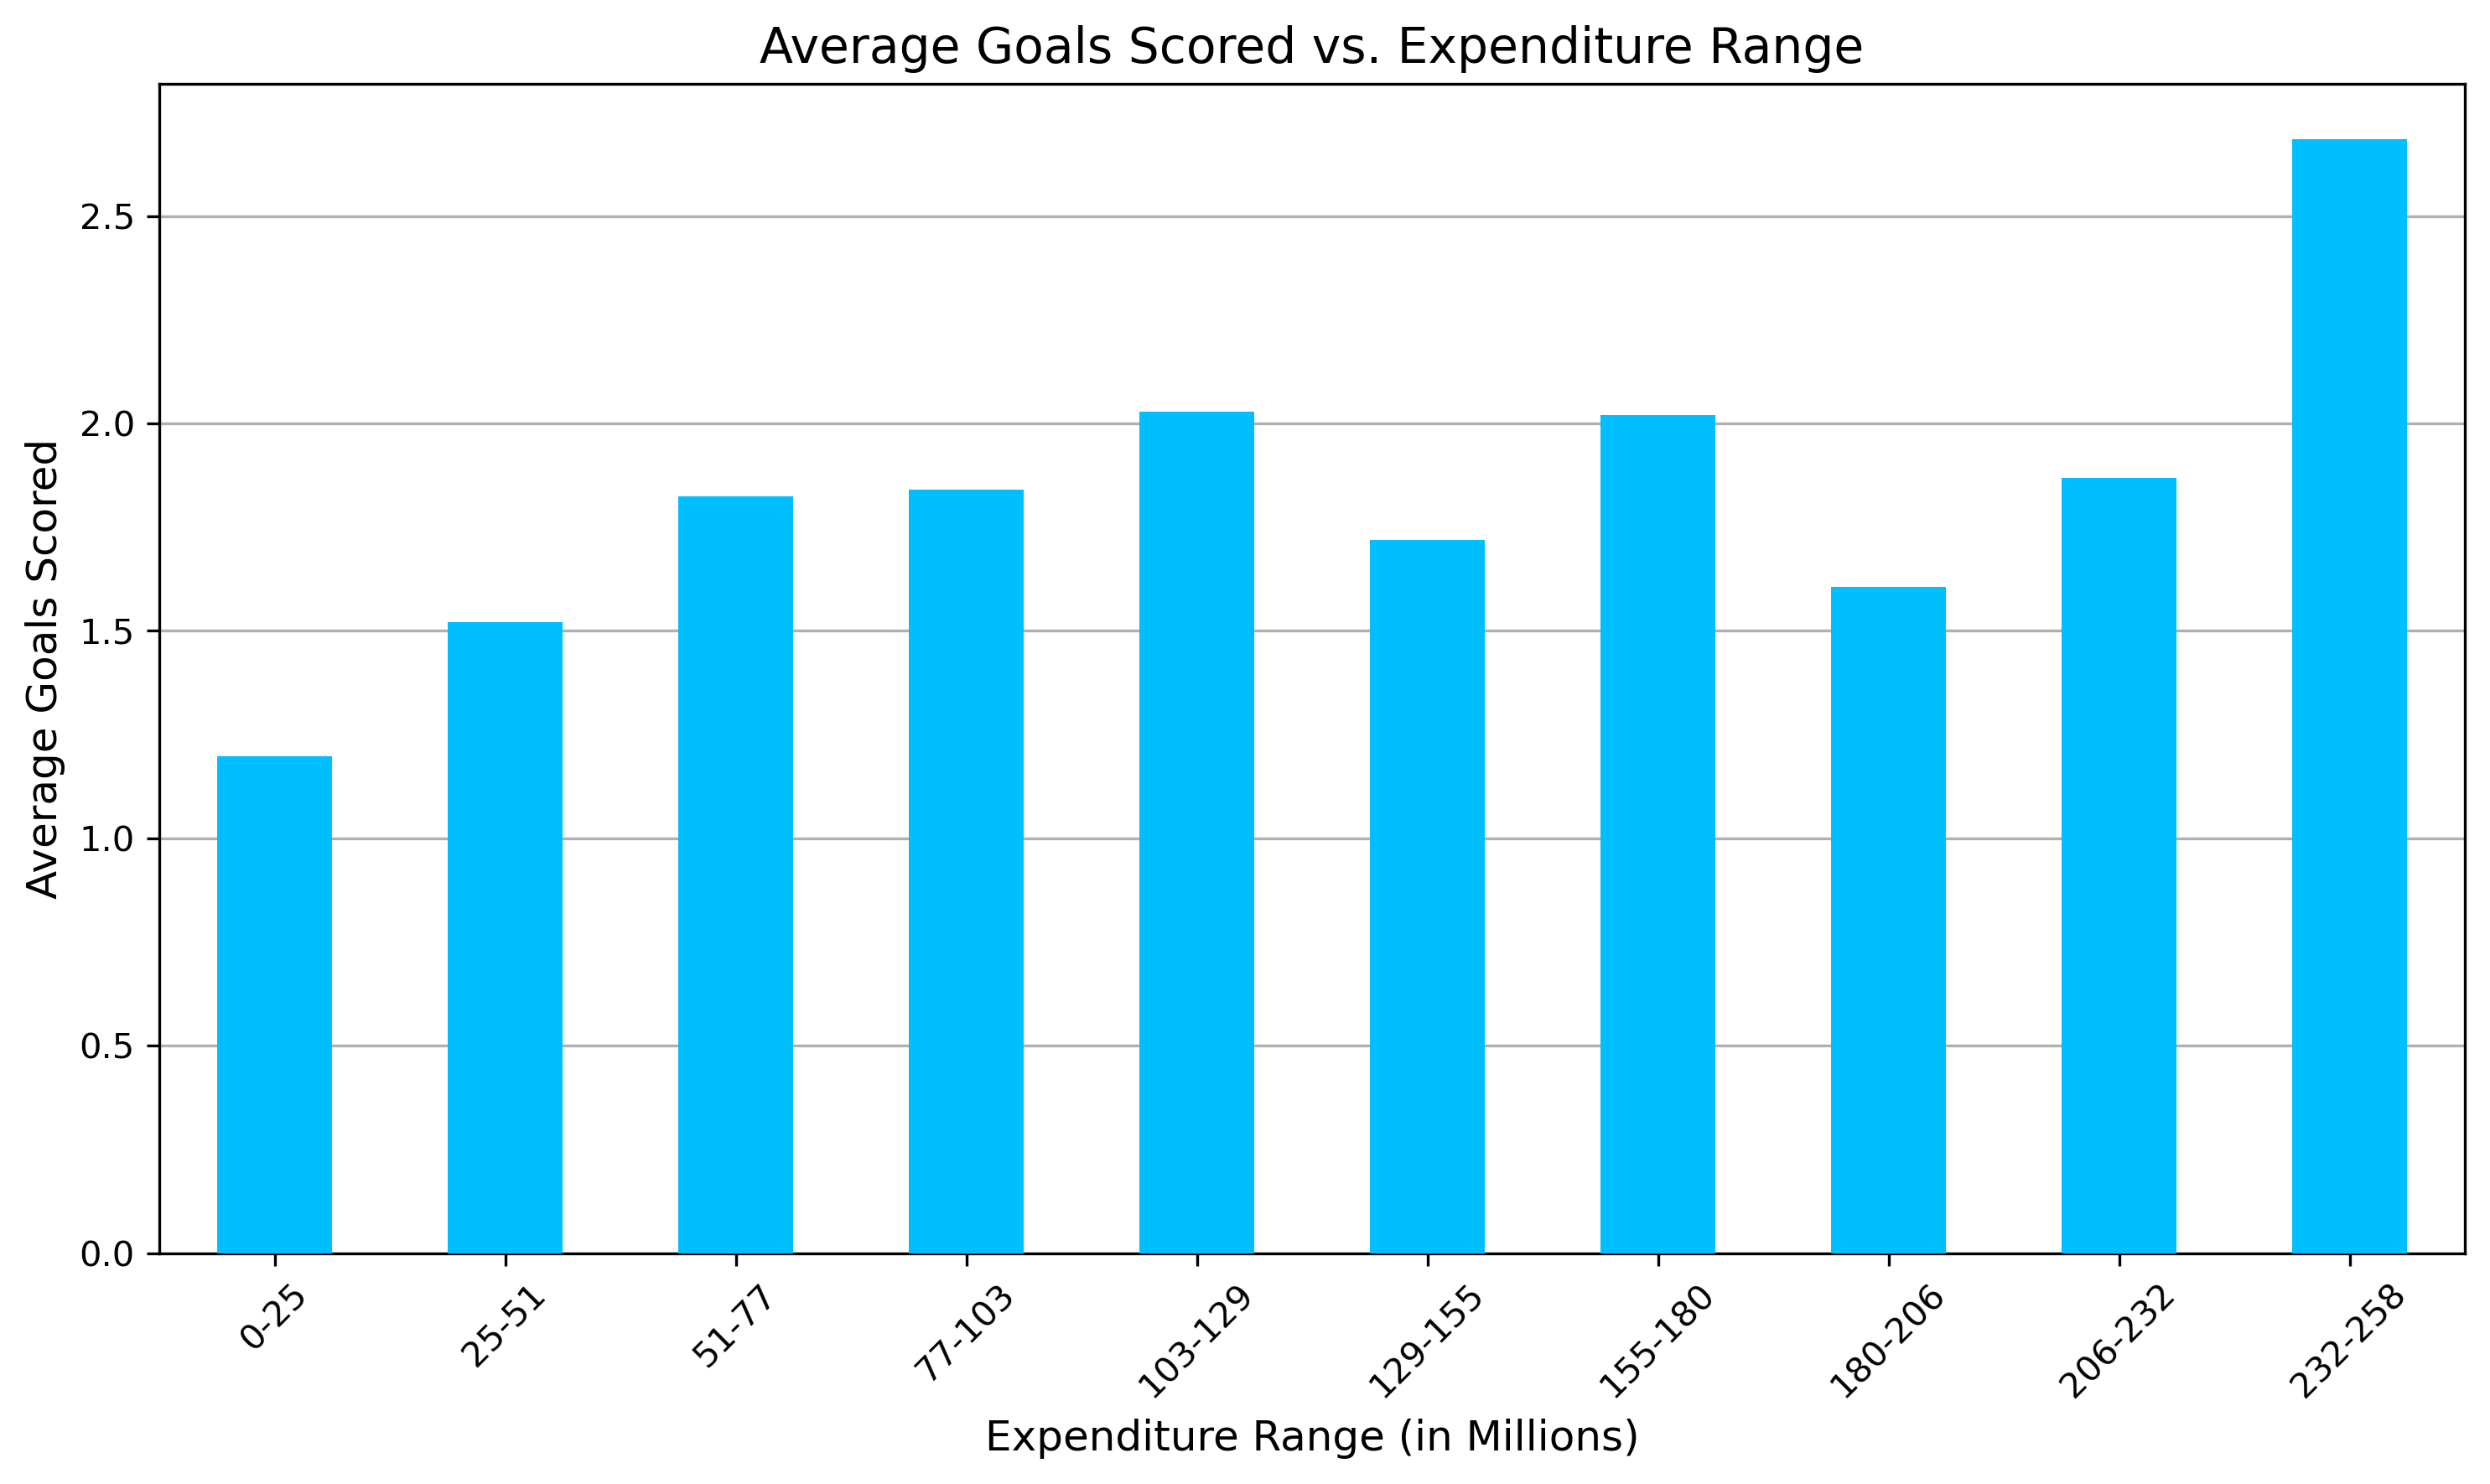

In [42]:
# Create a dataset for team expenditure and performance
team_data = pd.DataFrame({
    'team_expenditure': pd.concat([
        matches_df['home_team_expenditure'], 
        matches_df['away_team_expenditure']
    ], ignore_index=True) / 1e6,  # Convert to millions
    'team_goals': pd.concat([
        matches_df['home_team_goal'], 
        matches_df['away_team_goal']
    ], ignore_index=True)
})

# Bin the expenditures into ranges (in millions)
team_data['expenditure_bins'] = pd.cut(team_data['team_expenditure'], bins=10)

# Calculate the average goals scored for each expenditure bin with observed=True
binned_data = team_data.groupby('expenditure_bins', observed=True)['team_goals'].mean()

# Update x-tick labels to remove decimals
binned_labels = [
    f"{int(interval.left)}-{int(interval.right)}" for interval in binned_data.index
]

# Plot average goals scored by expenditure range
plt.figure(figsize=(10, 6), dpi=300)
binned_data.plot(kind='bar', color='deepskyblue', zorder=3)

# Add title and labels
plt.title("Average Goals Scored vs. Expenditure Range", fontsize=14)
plt.xlabel("Expenditure Range (in Millions)", fontsize=12)
plt.ylabel("Average Goals Scored", fontsize=12)
plt.xticks(ticks=range(len(binned_labels)), labels=binned_labels, rotation=45, fontsize=10)
plt.grid(axis='y', zorder=1)
plt.tight_layout()

# Display
plt.show()

### Squad visualization

Example, home players api id: 
[30726.0, 30362.0, 30620.0, 30865.0, 32569.0, 24148.0, 34944.0, 30373.0, 24154.0, 24157.0, 30829.0]
Home team players names:
['Sar', 'Brown', 'Ferdinand', 'Vidic', 'Evra', 'Fletcher', 'Carrick', 'Scholes', 'Giggs', 'Campbell', 'Rooney']
Away team players names:
['Given', 'Beye', 'Taylor', 'Coloccini', "N'Zogbia", 'Milner', 'Guthrie', 'Butt', 'Gutierrez', 'Duff', 'Martins']


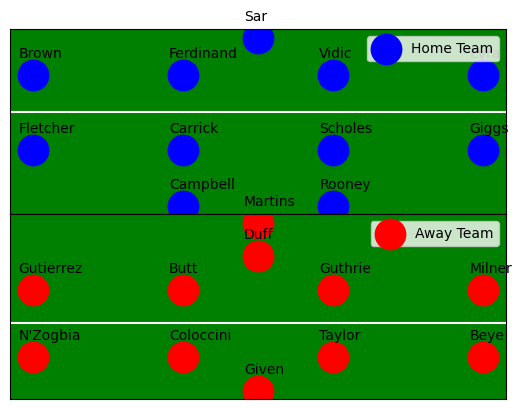

In [44]:
def squad_plotter(match_api_id_ = None):
    """
    Plots the positions of home and away players on a soccer field for a given match.

    Parameters:
    match_api_id_ (int): The match API ID to plot the player positions for.

    Returns:
    None
    """
    # Initialize lists to store player IDs and positions
    home_players_api_id = list()
    away_players_api_id = list()
    home_players_x = list()
    away_players_x = list()
    home_players_y = list()
    away_players_y = list()

    # Extract player IDs and positions for home and away teams
    for i in range(1, 12):
        home_players_api_id.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'home_player_{i}'].values[0])
        away_players_api_id.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'away_player_{i}'].values[0])
        home_players_x.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'home_player_X{i}'].values[0])
        away_players_x.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'away_player_X{i}'].values[0])
        home_players_y.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'home_player_Y{i}'].values[0])
        away_players_y.append(matches_df[matches_df["match_api_id"] == match_api_id_][f'away_player_Y{i}'].values[0])

    print('Example, home players api id: ')
    print(home_players_api_id)

    # Fetch players' names
    players_api_id = [home_players_api_id, away_players_api_id]
    players_names = [[None] * 11, [None] * 11]

    for i in range(2):
        players_api_id_not_none = [x for x in players_api_id[i] if x is not None]
        for player in players_api_id_not_none:
            player = int(player)
            name = player_df[player_df['player_api_id'] == player]['player_name'].values[0].split()[-1]
            players_names[i][players_api_id[i].index(player)] = name

    print('Home team players names:')
    print(players_names[0])
    print('Away team players names:')
    print(players_names[1])

    # Adjust player positions for plotting
    home_players_x = [5 if x == 1 else x for x in home_players_x]
    away_players_x = [5 if x == 1 else x for x in away_players_x]

    # Plot home team (in blue)
    plt.subplot(2, 1, 1)
    plt.rc('figure', figsize=(6, 10), dpi=300)
    plt.gca().invert_yaxis()  # Invert y axis to start with the goalkeeper at the top
    plt.gca().set_facecolor('green')  # Set background color to green
    for label, x, y in zip(players_names[0], home_players_x, home_players_y):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', va='bottom', color='black')
    plt.scatter(home_players_x, home_players_y, s=480, c='blue', label='Home Team')
    plt.grid(False)  # Disable grid lines
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.legend(loc='upper right')

    # Plot away team (in red)
    plt.subplot(2, 1, 2)
    plt.rc('figure', figsize=(6, 10), dpi=300)
    plt.gca().invert_xaxis()  # Invert x axis to have right wingers on the right
    plt.gca().set_facecolor('green')  # Set background color to green
    for label, x, y in zip(players_names[1], away_players_x, away_players_y):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', va='bottom', color='black')
    plt.scatter(away_players_x, away_players_y, s=480, c='red', label='Away Team')
    plt.grid(False)  # Disable grid lines
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.legend(loc='upper right')

    # Add the middle grid line
    plt.subplot(2, 1, 1)
    plt.axhline(y=5, color='white', linestyle='-')  # Add horizontal line in the middle

    plt.subplot(2, 1, 2)
    plt.axhline(y=5, color='white', linestyle='-')  # Add horizontal line in the middle

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("/Users/nyahbay/Desktop/CME538/Big_Project/Figures/squad_formation.png", bbox_inches='tight')
    plt.show()

squad_plotter(489042)

### Squad Formation Distributions

In [46]:
matches_df["home_team_formation"].value_counts()

home_team_formation
4-2-3-1                5289
4-4-2                  3168
4-3-3                  2697
4-3-1-2                 649
4-4-1-1                 607
4-2-2-2                 551
3-5-2                   538
4-5-1                   506
4-1-2-1-2               494
4-1-4-1                 419
4-1-2-2-1               372
4-1-3-2                 248
4-3-2-1                 215
3-4-3                   157
3-4-2-1                 133
3-5-1-1                 119
1-1-1-1-1-1-1-1-1-1     103
5-3-2                    95
3-4-1-2                  94
4-1-2-3                  63
5-4-1                    45
4-2-1-3                  33
3-2-3-2                  11
3-3-3-1                   5
5-3-1-1                   2
1-1-1-1-1-1-1-1-1         2
4-2-2-1                   1
6-3                       1
Name: count, dtype: int64

In [47]:
matches_df["away_team_formation"].value_counts()

away_team_formation
4-2-3-1                5322
4-4-2                  2884
4-3-3                  2683
4-5-1                   678
4-4-1-1                 619
4-3-1-2                 591
3-5-2                   554
4-2-2-2                 542
4-1-4-1                 492
4-1-2-1-2               429
4-1-2-2-1               367
4-1-3-2                 229
4-3-2-1                 227
3-4-3                   157
3-4-2-1                 149
3-5-1-1                 145
5-3-2                   116
1-1-1-1-1-1-1-1-1-1     105
5-4-1                   103
3-4-1-2                  92
4-1-2-3                  74
4-2-1-3                  28
3-2-3-2                  15
3-3-3-1                  10
5-3-1-1                   2
2-3-1-1                   1
3-3-1-1-1                 1
3-2-1-1                   1
3-1-3-1-2                 1
Name: count, dtype: int64

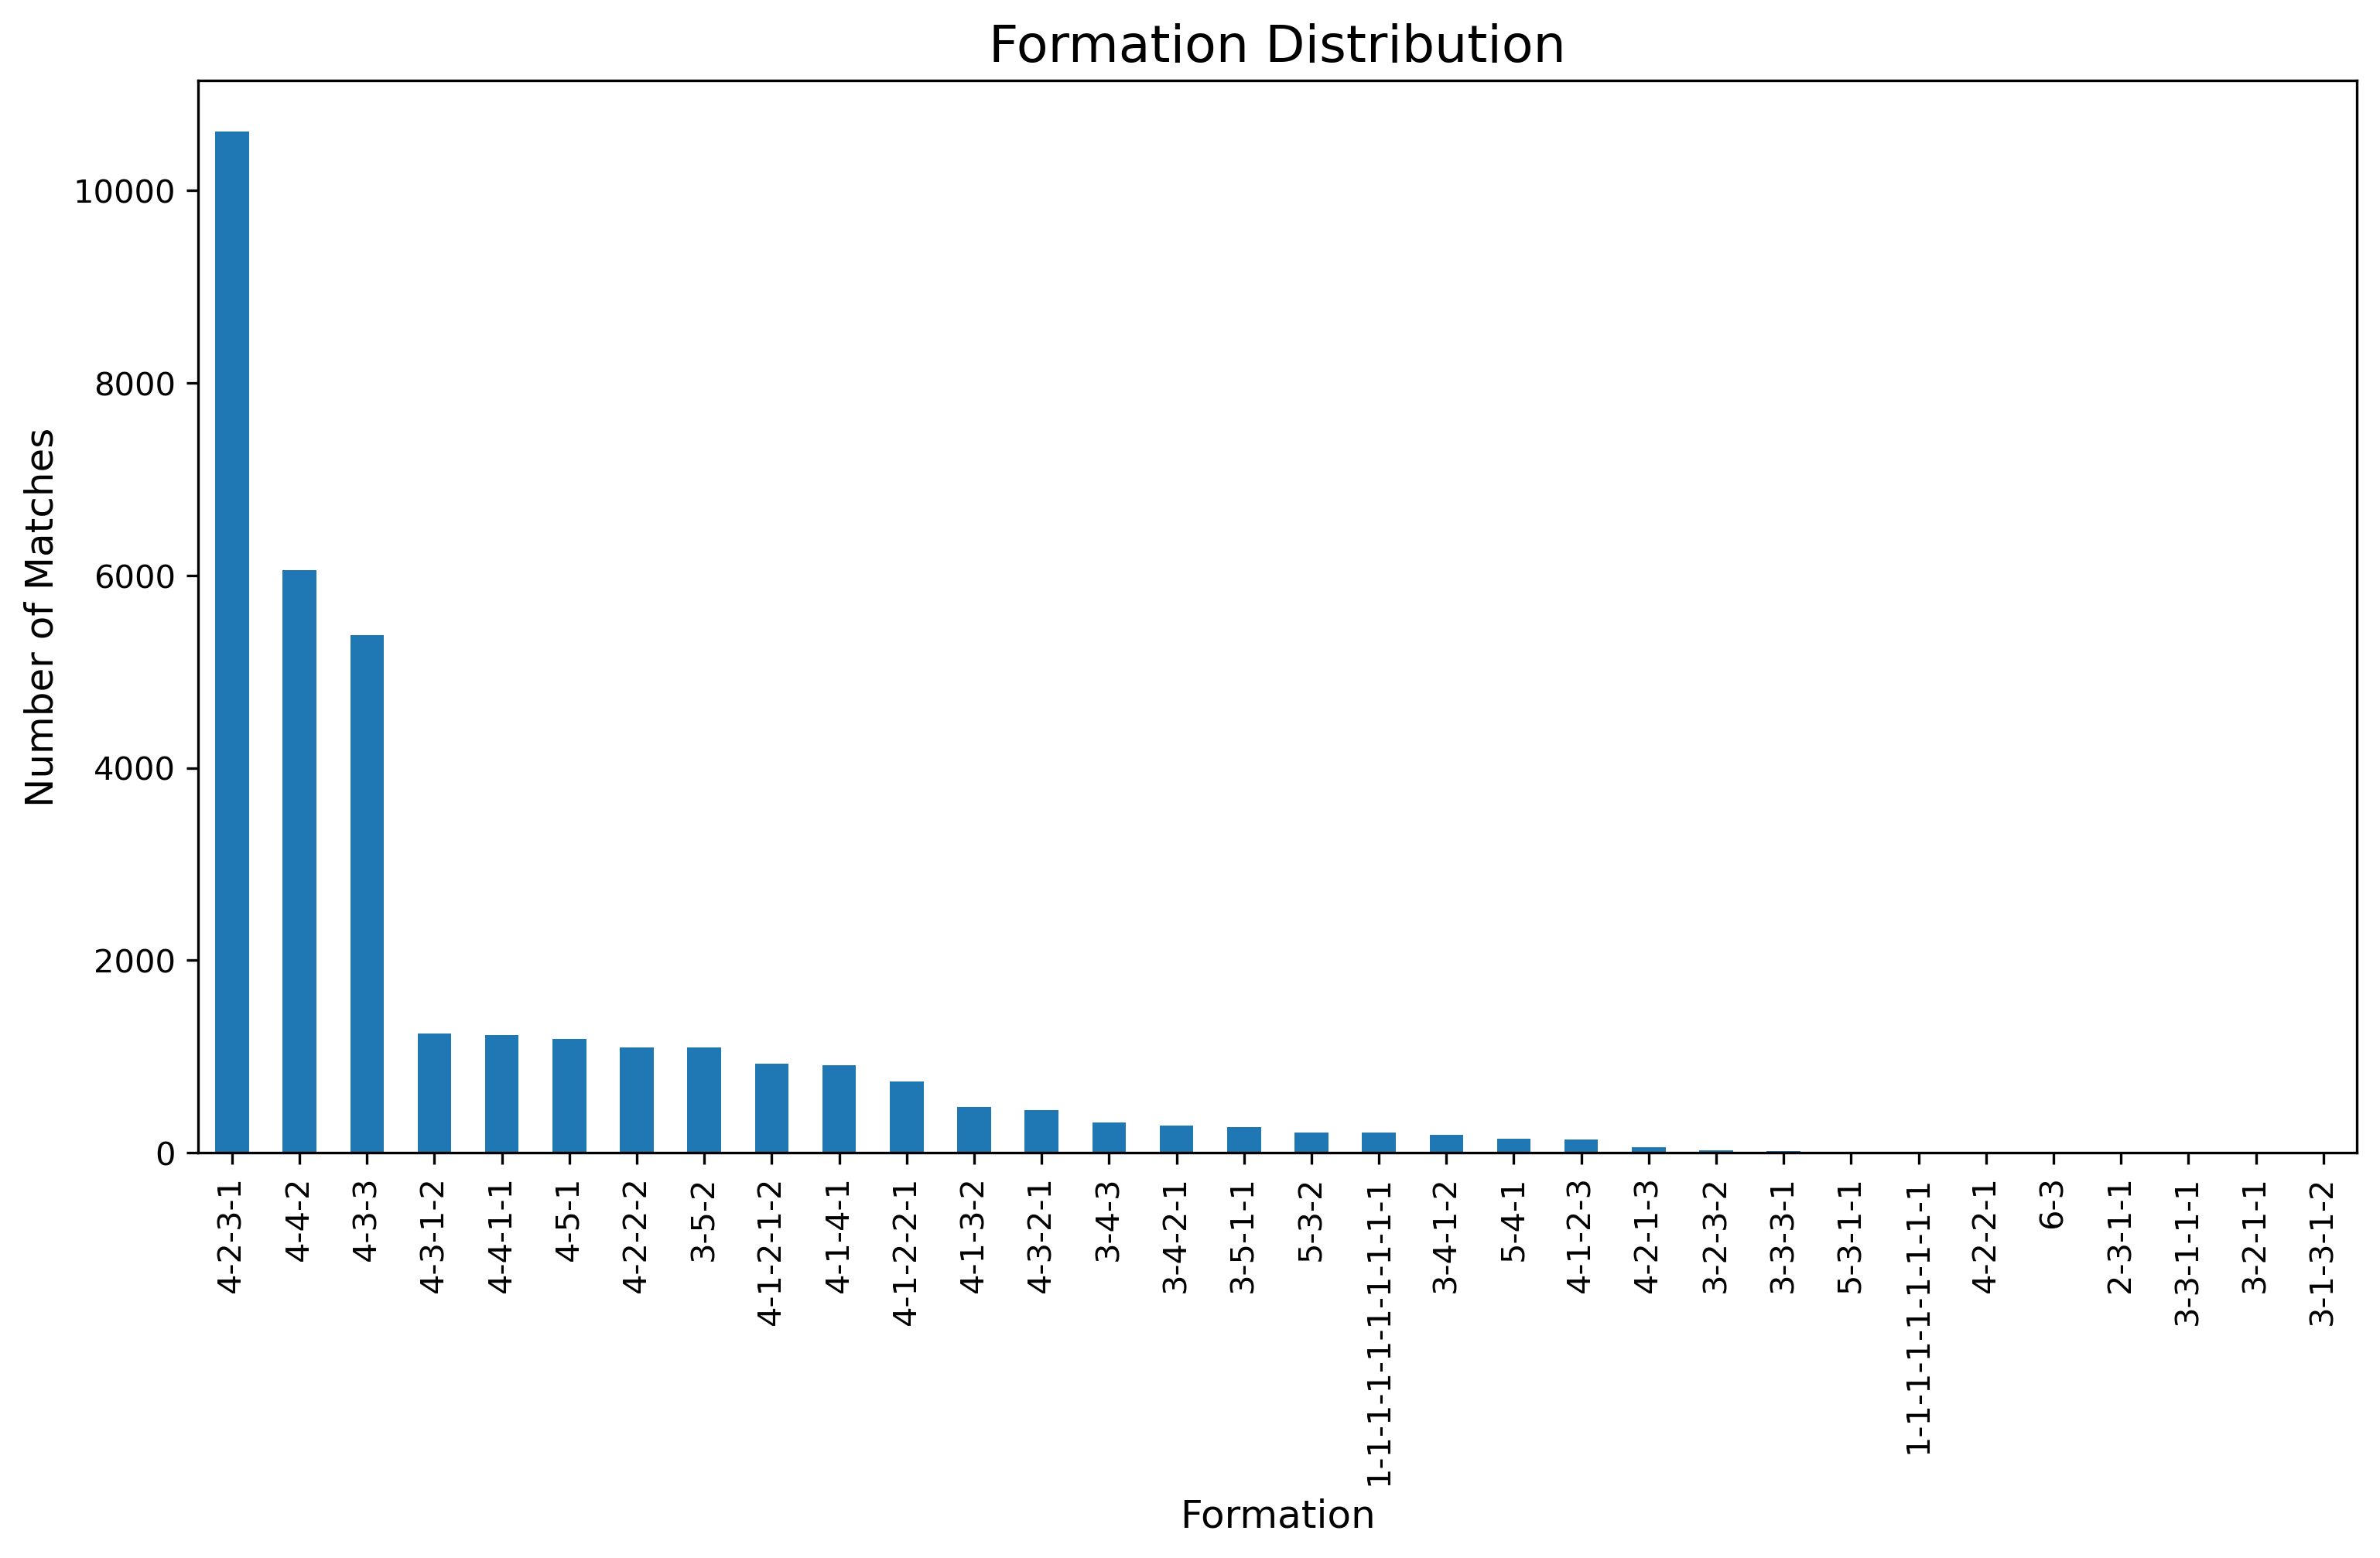

In [48]:
# Count formations and plot their distribution
formation_counts = matches_df[['home_team_formation', 'away_team_formation']].melt()
formation_distribution = formation_counts['value'].value_counts()

# Plot the formation distribution
plt.figure(figsize=(12, 6), dpi=300)
formation_distribution.plot(kind='bar')

# Add title and labels
plt.title("Formation Distribution", fontsize=16)
plt.xlabel("Formation", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

### Correlation Heatmaps

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


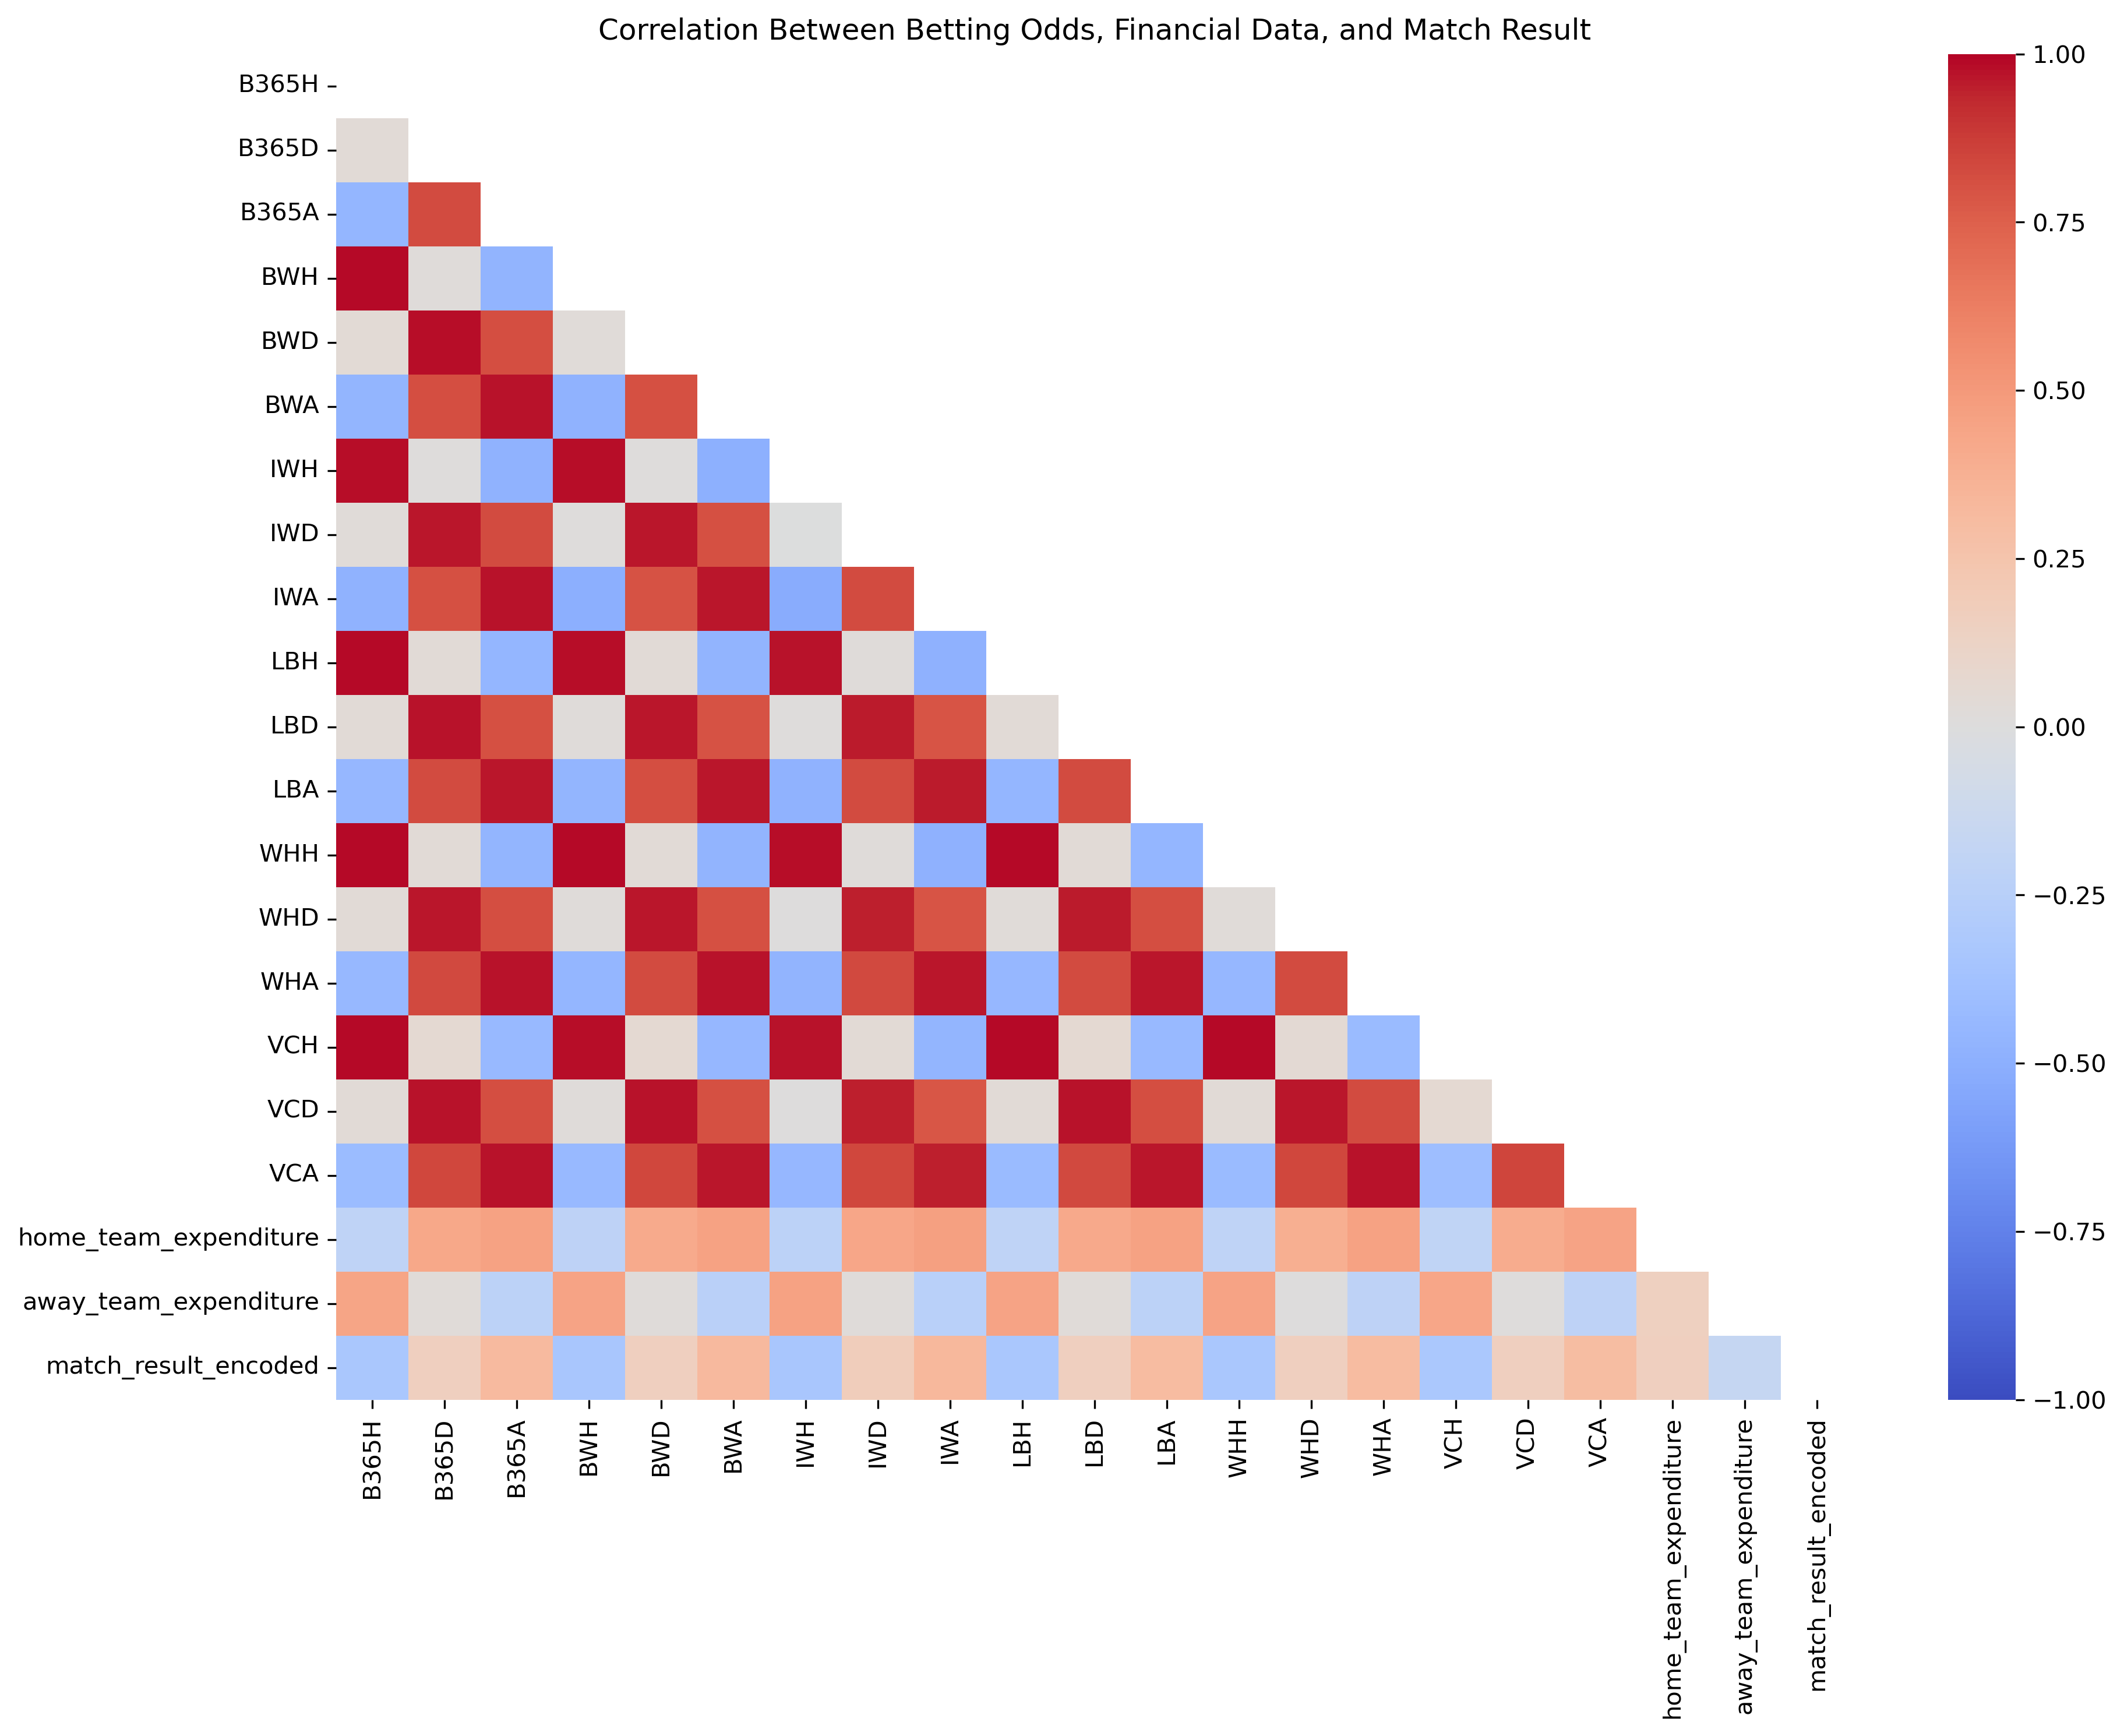

In [50]:
# List of betting and finance columns
betting_columns = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
                   'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']

financial_columns = ['home_team_expenditure', 'away_team_expenditure']

# Ensure betting columns and match_result exist in the dataset
betting_df = matches_df[betting_columns + financial_columns + ['match_result']].copy()

# Encode 'match_result' as numeric (e.g., "Away Win" -> 0, "Draw" -> 1, "Home Win" -> 2)
match_result_mapping = {"Away Win": 0, "Draw": 1, "Home Win": 2}
betting_df['match_result_encoded'] = betting_df['match_result'].map(match_result_mapping)

# Compute the correlation matrix
correlation_matrix = betting_df[betting_columns + financial_columns + ['match_result_encoded']].corr()

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the lower triangular correlation matrix
plt.figure(figsize=(14, 10), dpi=300)
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Between Betting Odds, Financial Data, and Match Result")
plt.show()

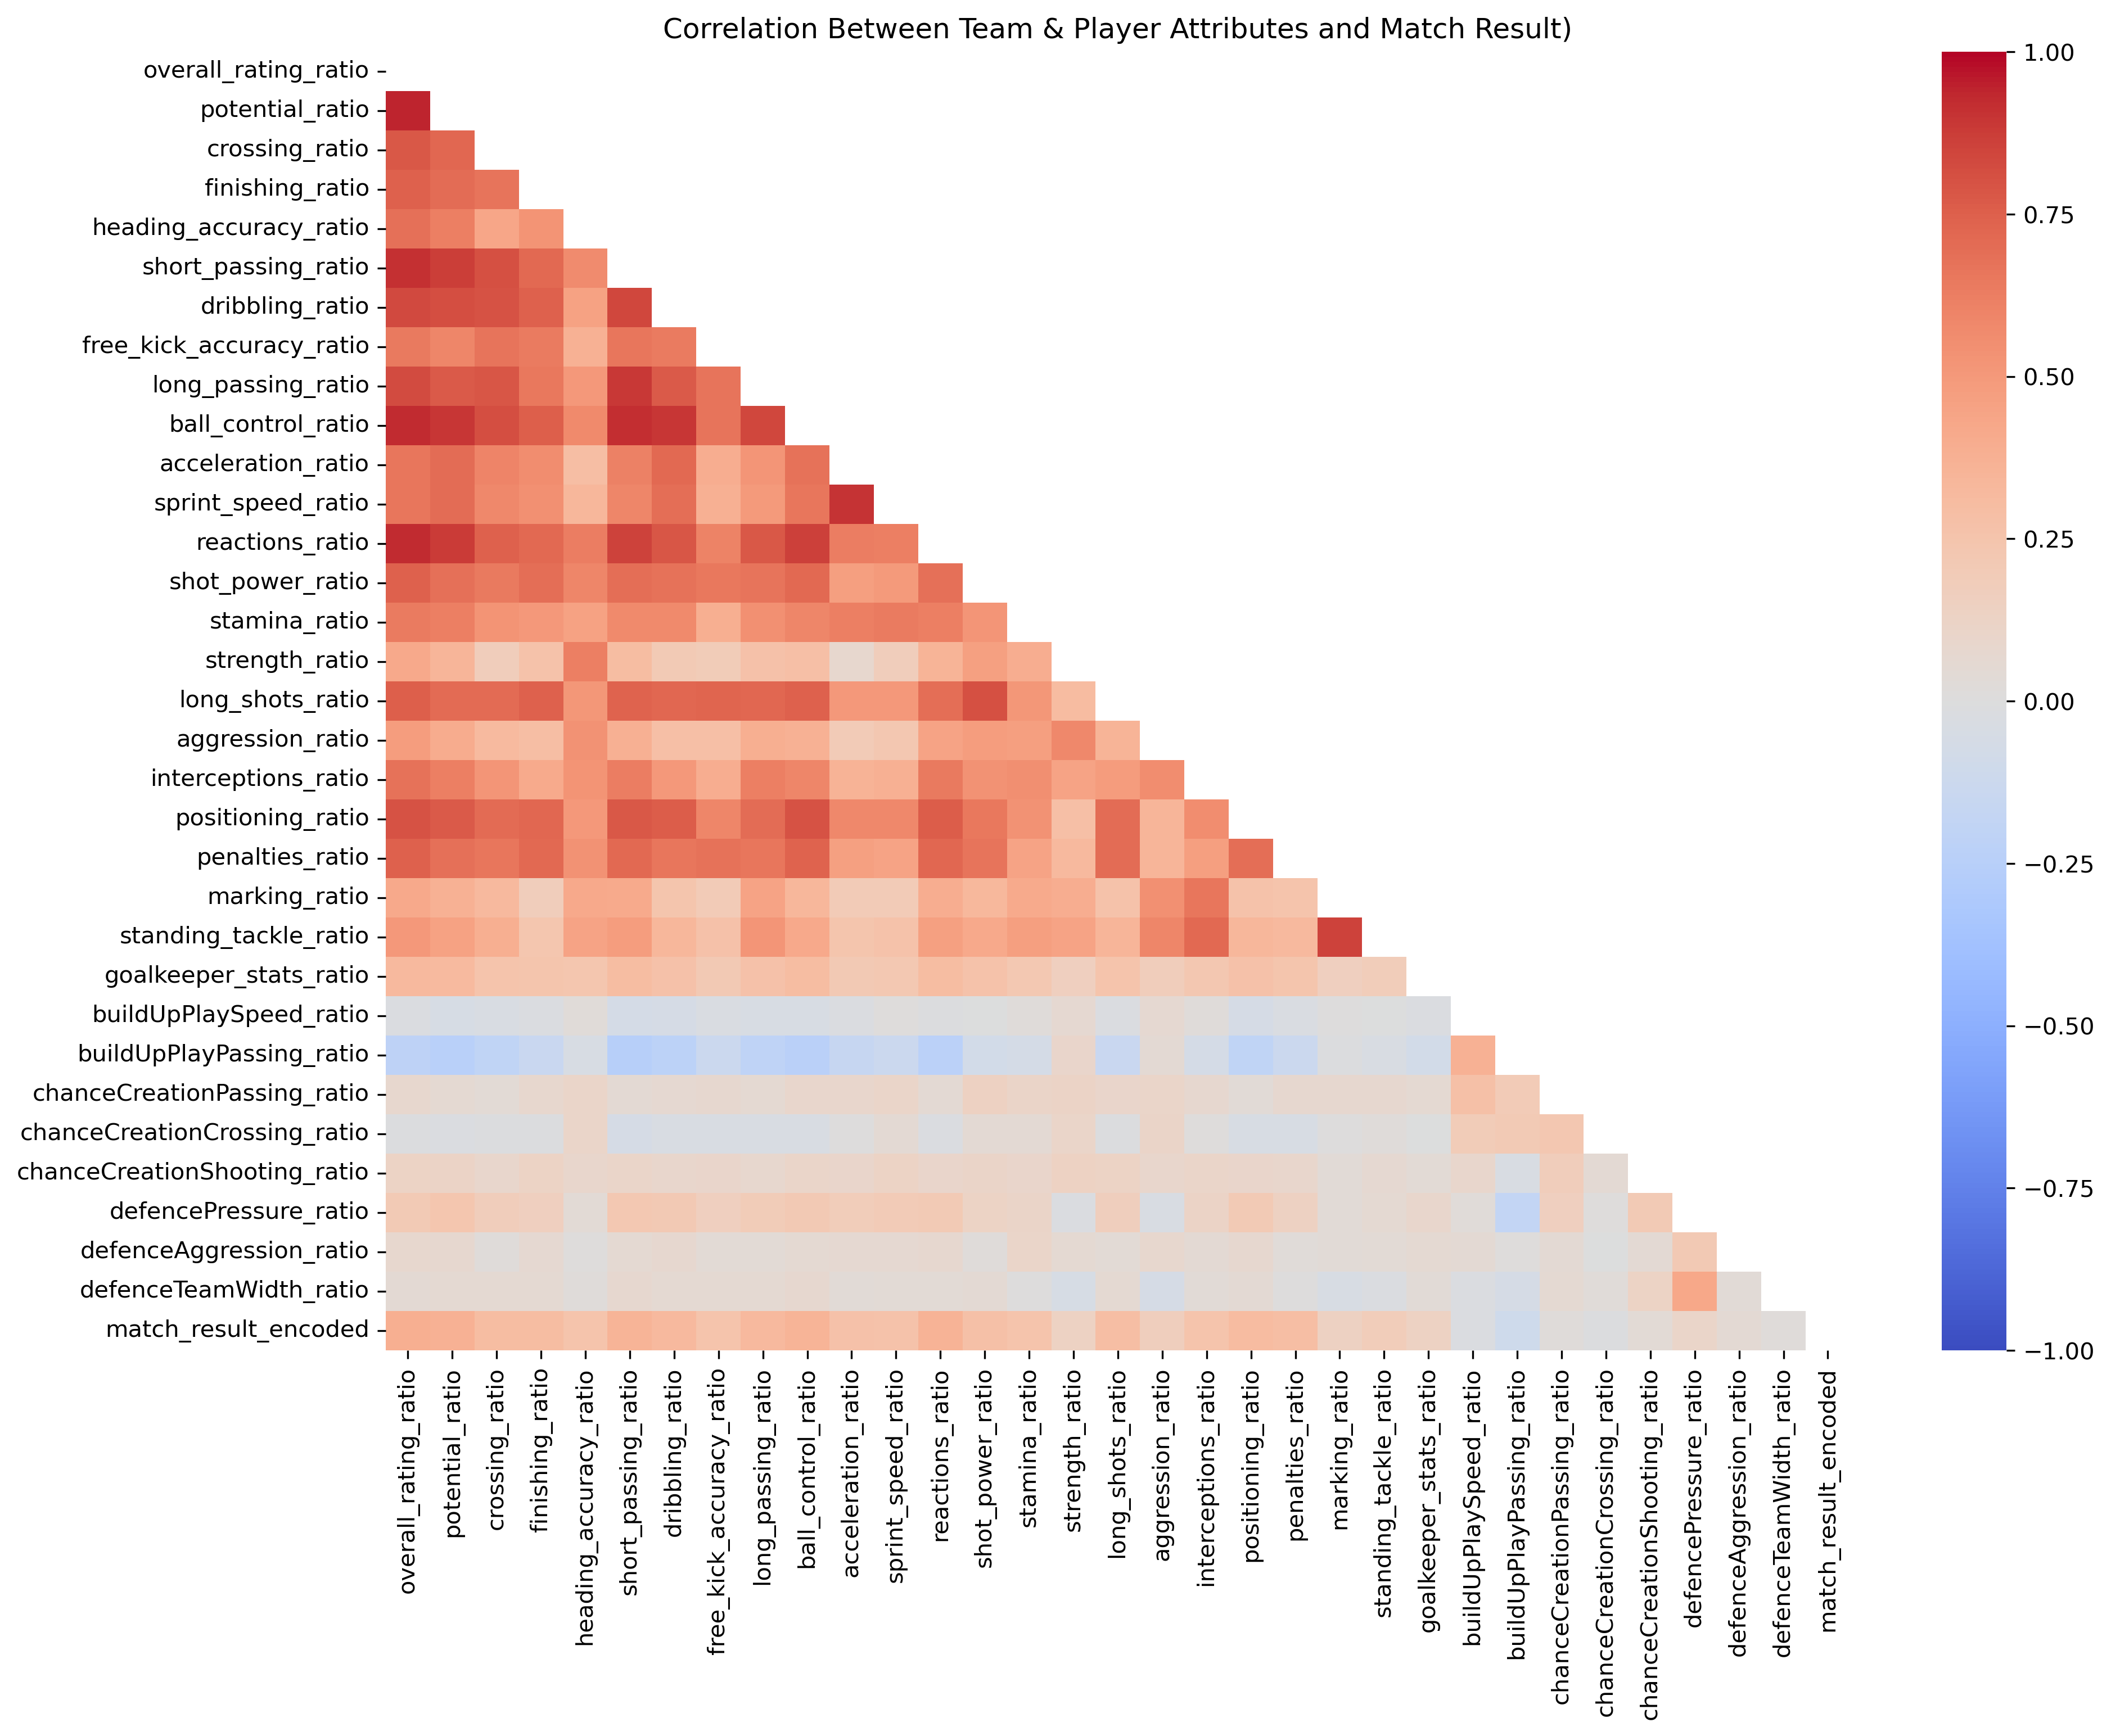

In [51]:
# List of ratio columns
ratio_columns = [
    'overall_rating_ratio', 'potential_ratio', 'crossing_ratio', 'finishing_ratio', 
    'heading_accuracy_ratio', 'short_passing_ratio', 'dribbling_ratio', 'free_kick_accuracy_ratio',
    'long_passing_ratio', 'ball_control_ratio', 'acceleration_ratio', 'sprint_speed_ratio',
    'reactions_ratio', 'shot_power_ratio', 'stamina_ratio', 'strength_ratio', 'long_shots_ratio', 
    'aggression_ratio', 'interceptions_ratio', 'positioning_ratio', 'penalties_ratio', 'marking_ratio',
    'standing_tackle_ratio', 'goalkeeper_stats_ratio', 'buildUpPlaySpeed_ratio', 
    'buildUpPlayPassing_ratio', 'chanceCreationPassing_ratio', 'chanceCreationCrossing_ratio', 
    'chanceCreationShooting_ratio', 'defencePressure_ratio','defenceAggression_ratio', 'defenceTeamWidth_ratio'
]

# Ensure ratio columns and match_result exist in the dataset
ratio_df = matches_df[ratio_columns + ['match_result']].copy()

# Encode 'match_result' as numeric (e.g., "Away Win" -> 0, "Draw" -> 1, "Home Win" -> 2)
match_result_mapping = {"Away Win": 0, "Draw": 1, "Home Win": 2}
ratio_df['match_result_encoded'] = ratio_df['match_result'].map(match_result_mapping)

# Compute the correlation matrix
correlation_matrix = ratio_df[ratio_columns + ['match_result_encoded']].corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the lower triangular correlation matrix
plt.figure(figsize=(14, 10), dpi=300)
sns.heatmap(correlation_matrix, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Between Team & Player Attributes and Match Result)")
plt.show()